# 차례
# 1. 이상치 확인(이상치 처리 전)
- 1.1 이상치 개수/범위 확인
- 1.2 각 변수별 이상치를 크기 순으로 나열
- 1.3. 히스토그램(이상치 개수)
- 1.4 상자그림 (이상치 분포)
- 1.5 Violin plot
- 1.6 산점도
---------------------------------------------------------------------------

# 2. 이상치 판단
- 2.1 이상치 판단 방법별 분리
- 2.1.1이상치가 아니지만 주관적으로 판단하여 이상치를 정상 범주에 넣은 변수
-- fixed acidity/ volatile acidity/ residual sugar/ total sulfur dioxide/ sulphates
- 2.1.2 주관적 판단하지 않은 이상치를 가지는 변수
-- citric acid/ free sulfur dioxide/ alcohol
- 2.1.3 Z score 통해 이상치 판단
-- pH/ density
- 2.1.4 규칙성을 찾아 이상치 판단
-- Chlorides
------------------------------------------------------------------------------
# 3. 이상치 산점도
- 3.1 이상치가 아니지만 주관적으로 판단하여 이상치를 정상 범주에 넣은 변수
- 3.2 주관적 판단하지 않은 이상치를 가지는 변수
- 3.3 Z score 통해 이상치 판단
- 3.4 규칙성을 찾아 이상치 판단
--------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wine = pd.read_csv('./winequality-red.csv')
df = wine.copy()
df1=df.drop_duplicates()

# 1. 이상치 확인(이상치 처리 전)

# 1.1 이상치 개수/범위 확인

In [3]:
# 이상치 확인 함수
def detect_outliers(df1):
    q1 = df1.quantile(0.25)
    q3 = df1.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (df1 < lower_bound) | (df1 > upper_bound)
    return outliers

# 이상치 개수와 범위 출력을 위한 데이터프레임 생성
outliers_df1 = pd.DataFrame(index=df1.columns, columns=['Outlier Count', 'Outlier Range'])

# 각 변수에 대해 이상치 개수와 범위 계산
for column in df1.columns:
    outliers = detect_outliers(df1[column])
    outlier_count = outliers.sum()
    outlier_range = f"{df1[column][outliers].min()} - {df1[column][outliers].max()}"
    
    # 결과 저장
    outliers_df1.loc[column] = [outlier_count, outlier_range]

# 결과 출력
print("Outlier Information:")
outliers_df1

Outlier Information:


,Outlier Count,Outlier Range
fixed acidity,41,12.4 - 15.9
volatile acidity,19,1.02 - 1.58
citric acid,1,1.0 - 1.0
residual sugar,126,3.7 - 15.5
chlorides,87,0.012 - 0.611
free sulfur dioxide,26,43.0 - 72.0
total sulfur dioxide,45,125.0 - 289.0
density,35,0.99007 - 1.00369
pH,28,2.74 - 4.01
sulphates,55,1.0 - 2.0


# 1.2 각 변수별 이상치를 크기 순으로 나열

In [4]:
# 모든 열에 대한 반복문
for column_name in df1.columns:
    print("=" * 50)
    print(f"Outliers in column '{column_name}':")
    
    # IQR 계산
    Q1 = df1[column_name].quantile(0.25)
    Q3 = df1[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 경계 정의
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 추출
    outliers = df1[(df1[column_name] < lower_bound) | (df1[column_name] > upper_bound)][column_name]
    
    # 이상치를 크기순으로 정렬
    sorted_outliers = outliers.sort_values()
    
    # 이상치 출력
    for i, (index, value) in enumerate(sorted_outliers.items(), start=1):
        print(f"{i}. Index: {index}, Value: {value}")
    
    # 이상치 개수 출력
    outlier_count = sorted_outliers.count()
    print(f"Number of outliers: {outlier_count}")

Outliers in column 'fixed acidity':
1. Index: 596, Value: 12.4
2. Index: 338, Value: 12.4
3. Index: 548, Value: 12.4
4. Index: 510, Value: 12.4
5. Index: 516, Value: 12.5
6. Index: 409, Value: 12.5
7. Index: 264, Value: 12.5
8. Index: 339, Value: 12.5
9. Index: 446, Value: 12.5
10. Index: 472, Value: 12.5
11. Index: 363, Value: 12.5
12. Index: 814, Value: 12.6
13. Index: 1224, Value: 12.6
14. Index: 359, Value: 12.6
15. Index: 440, Value: 12.6
16. Index: 560, Value: 12.7
17. Index: 394, Value: 12.7
18. Index: 599, Value: 12.7
19. Index: 205, Value: 12.8
20. Index: 429, Value: 12.8
21. Index: 364, Value: 12.8
22. Index: 811, Value: 12.9
23. Index: 538, Value: 12.9
24. Index: 559, Value: 13.0
25. Index: 470, Value: 13.0
26. Index: 601, Value: 13.2
27. Index: 611, Value: 13.2
28. Index: 509, Value: 13.3
29. Index: 294, Value: 13.3
30. Index: 680, Value: 13.3
31. Index: 328, Value: 13.4
32. Index: 353, Value: 13.5
33. Index: 381, Value: 13.7
34. Index: 347, Value: 13.8
35. Index: 374, Valu

# 1.3. 히스토그램(이상치 개수)

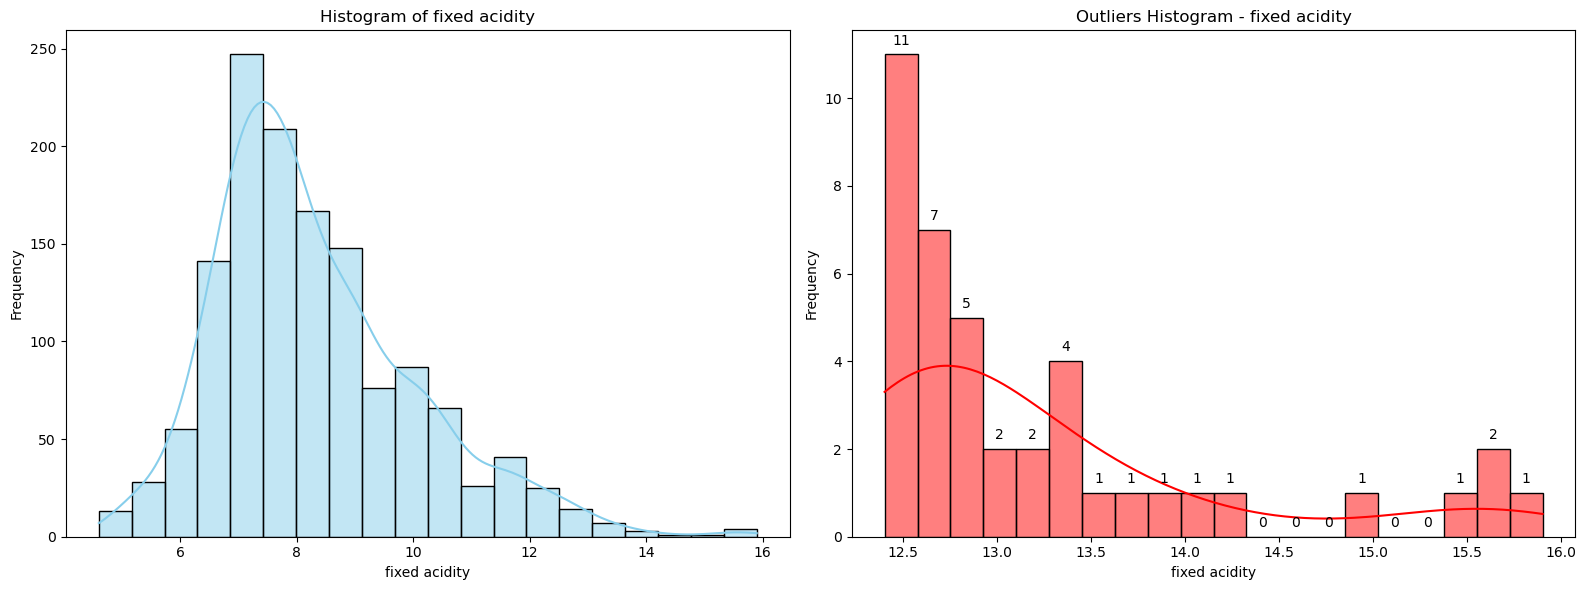

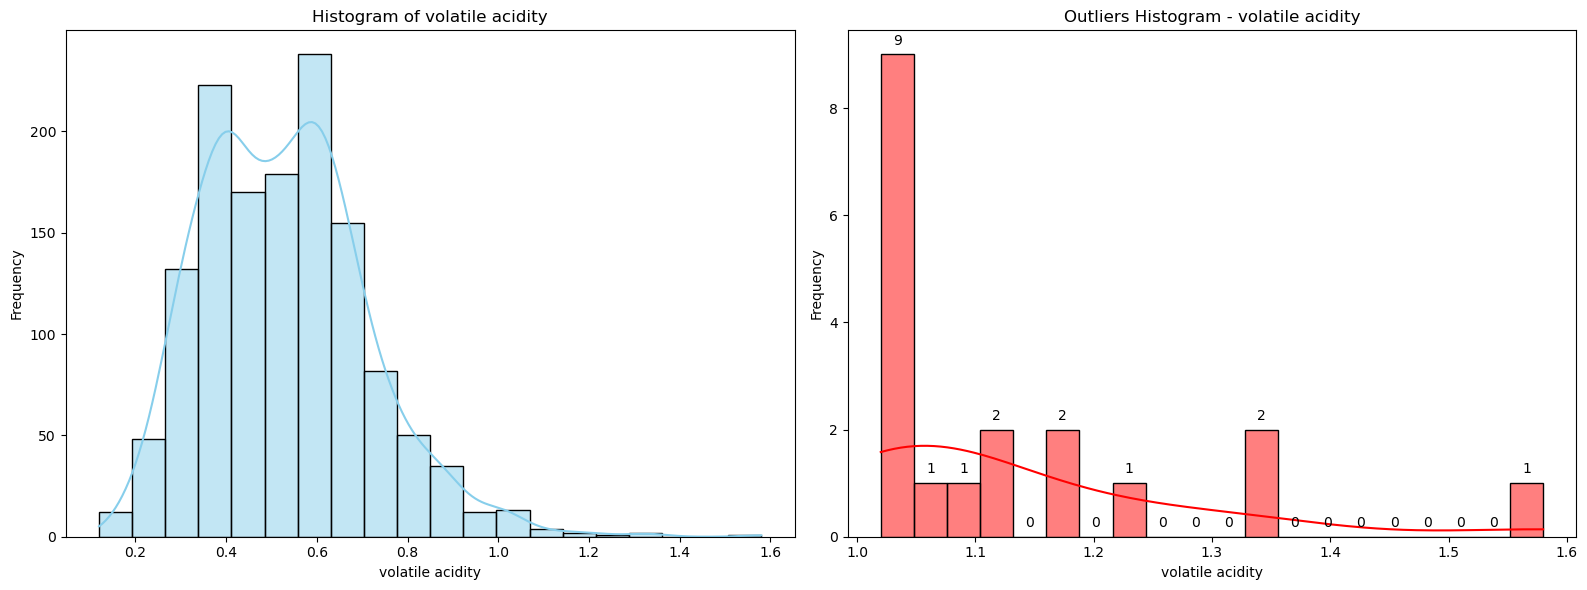

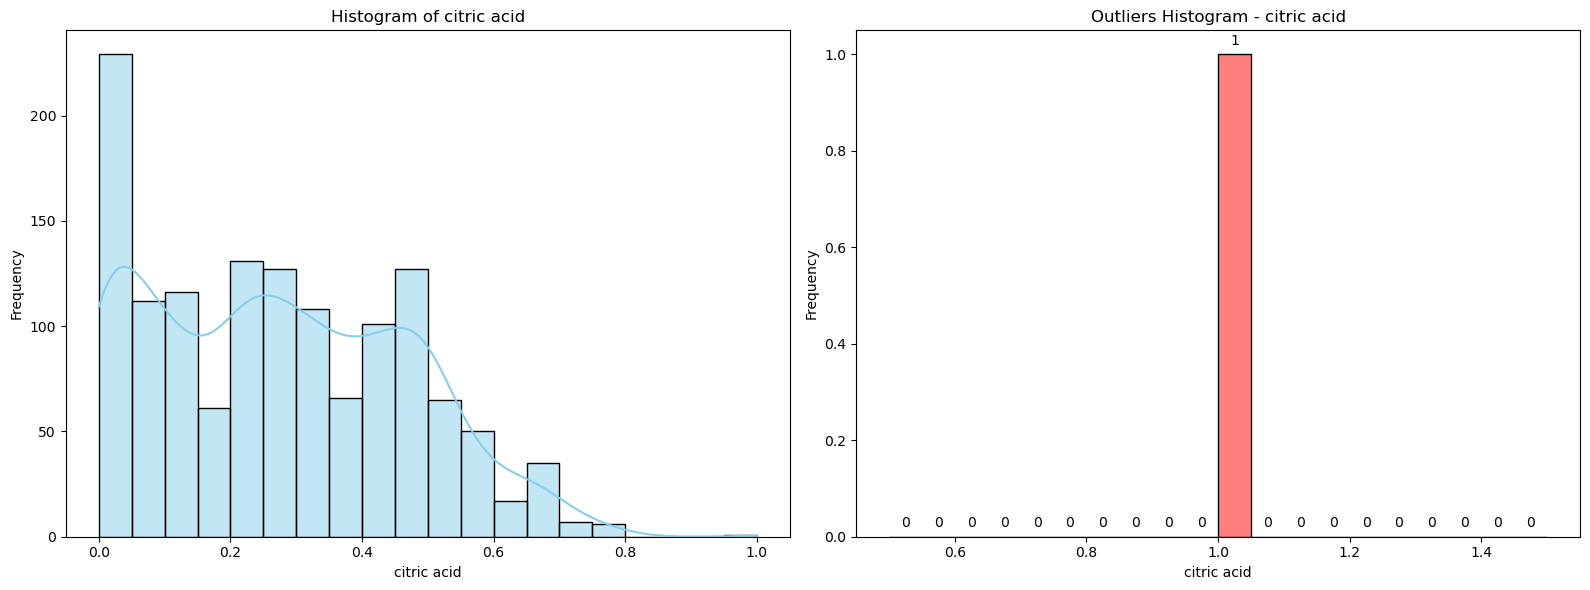

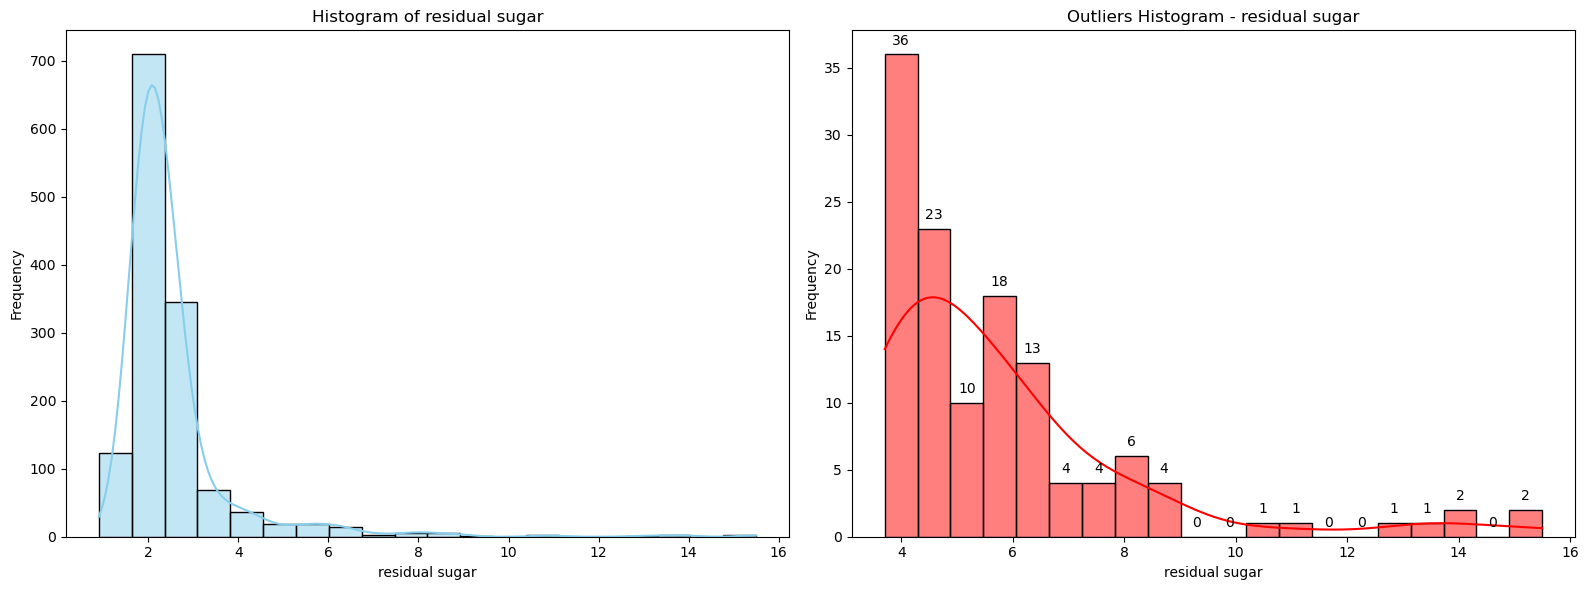

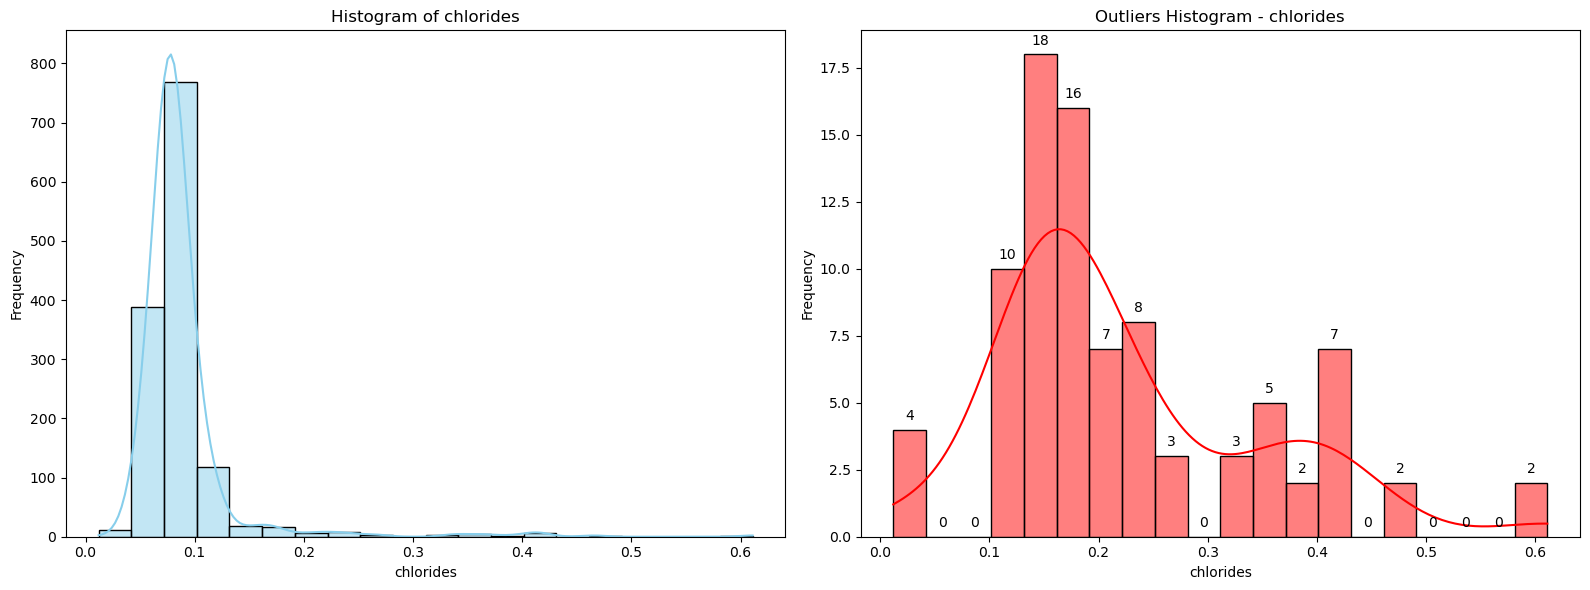

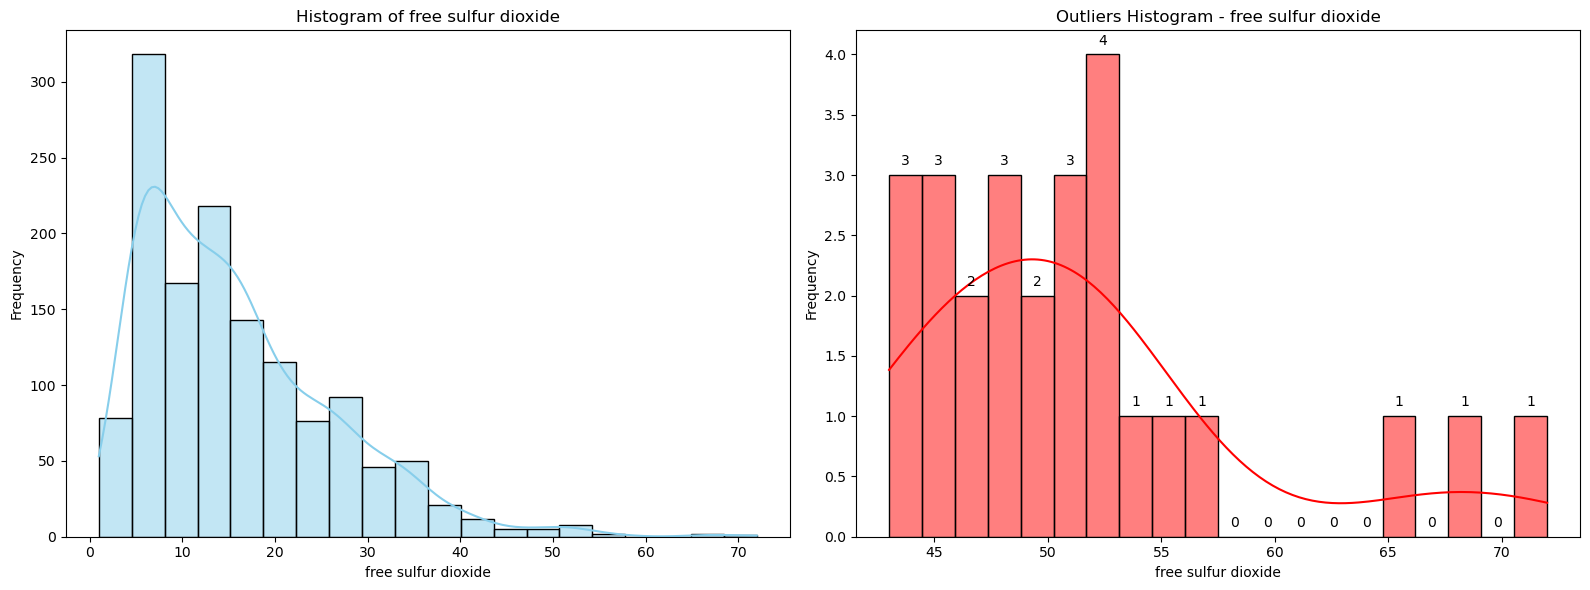

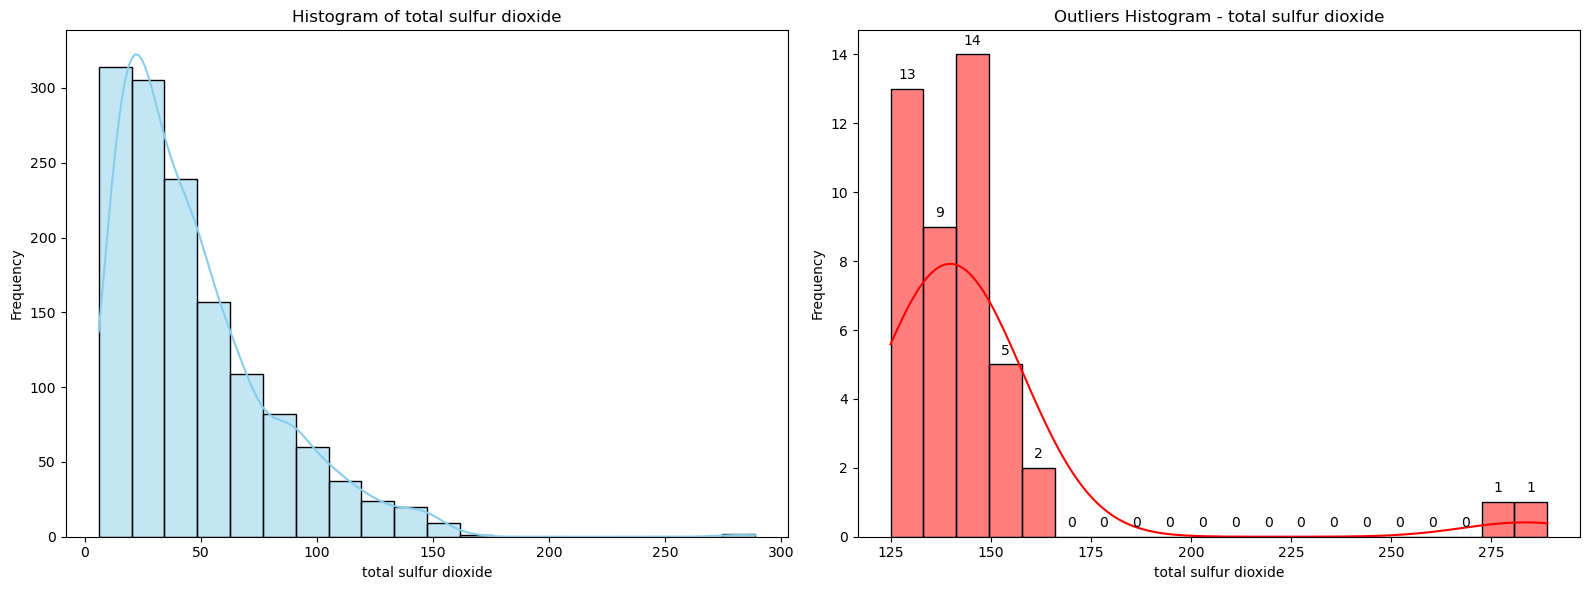

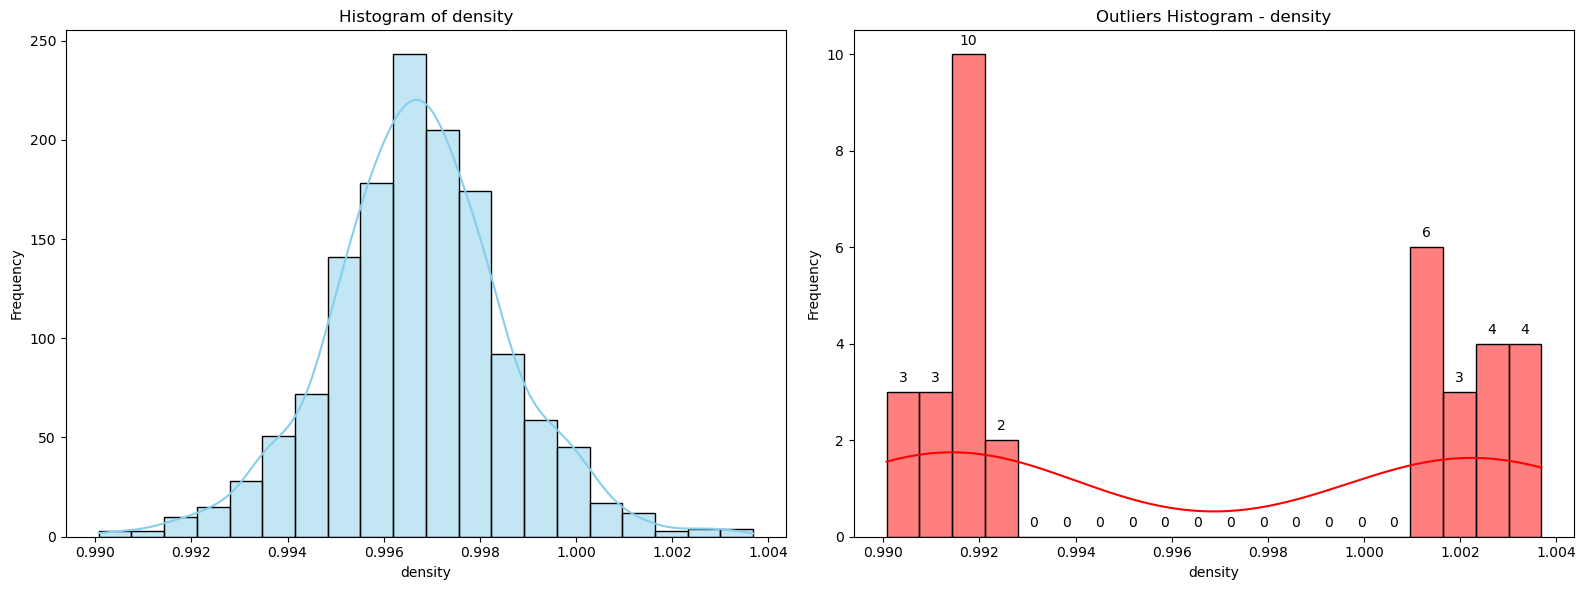

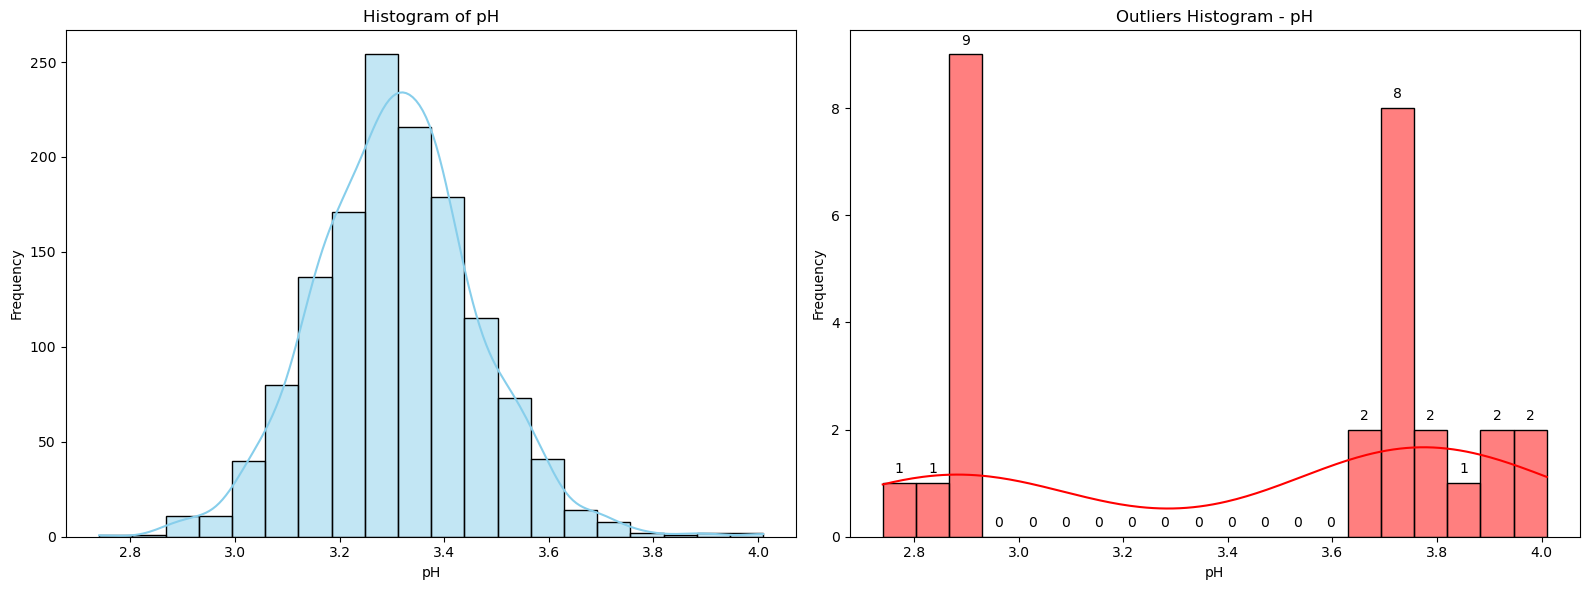

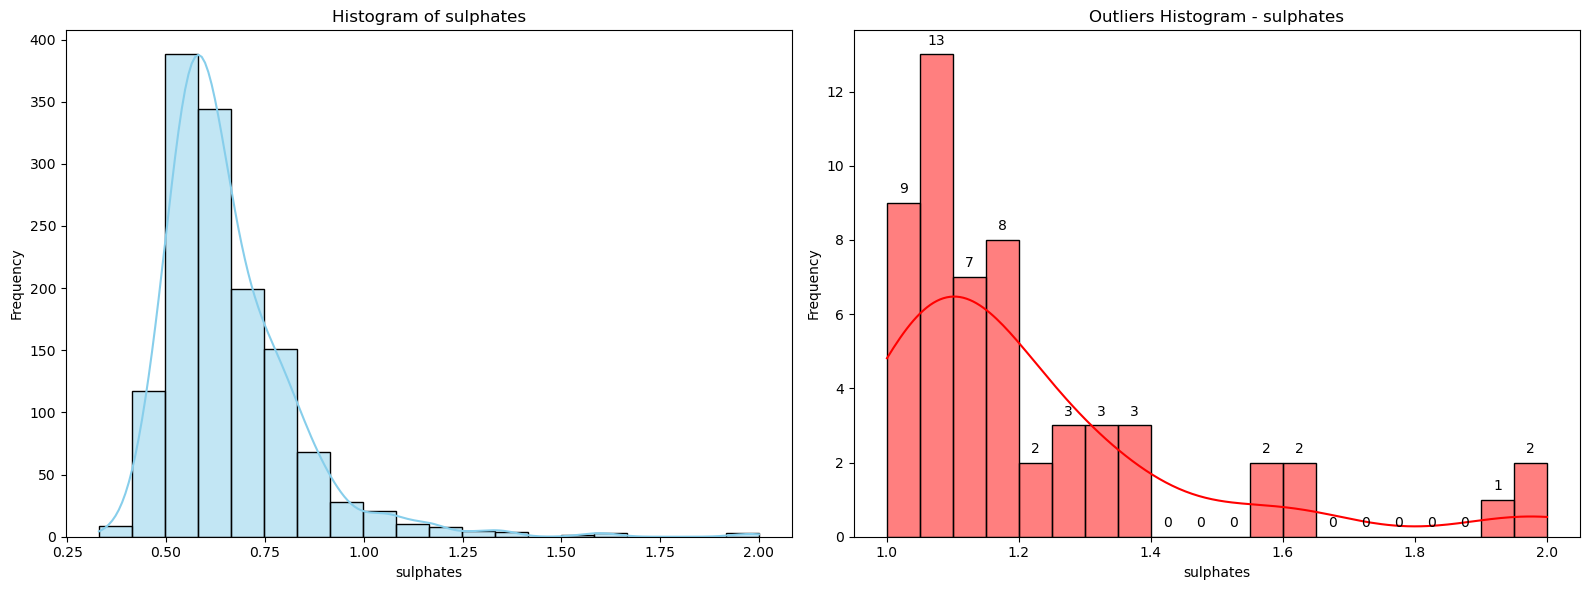

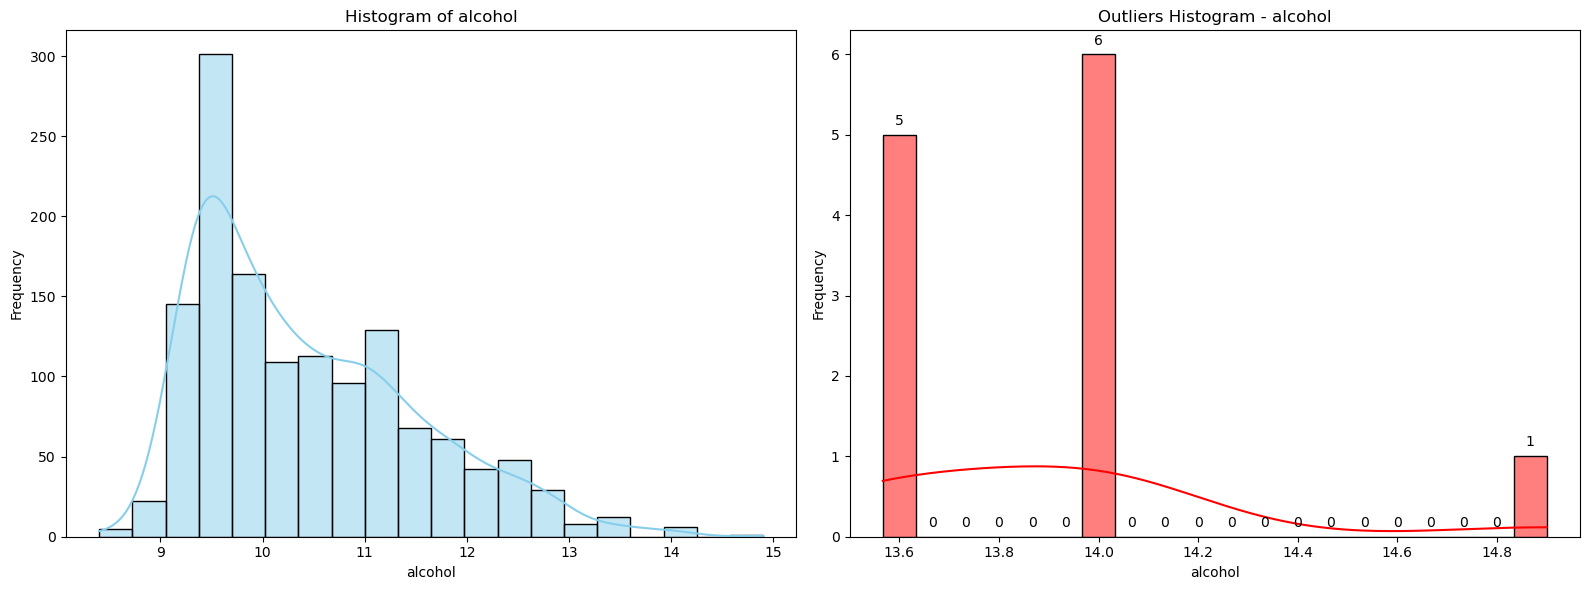

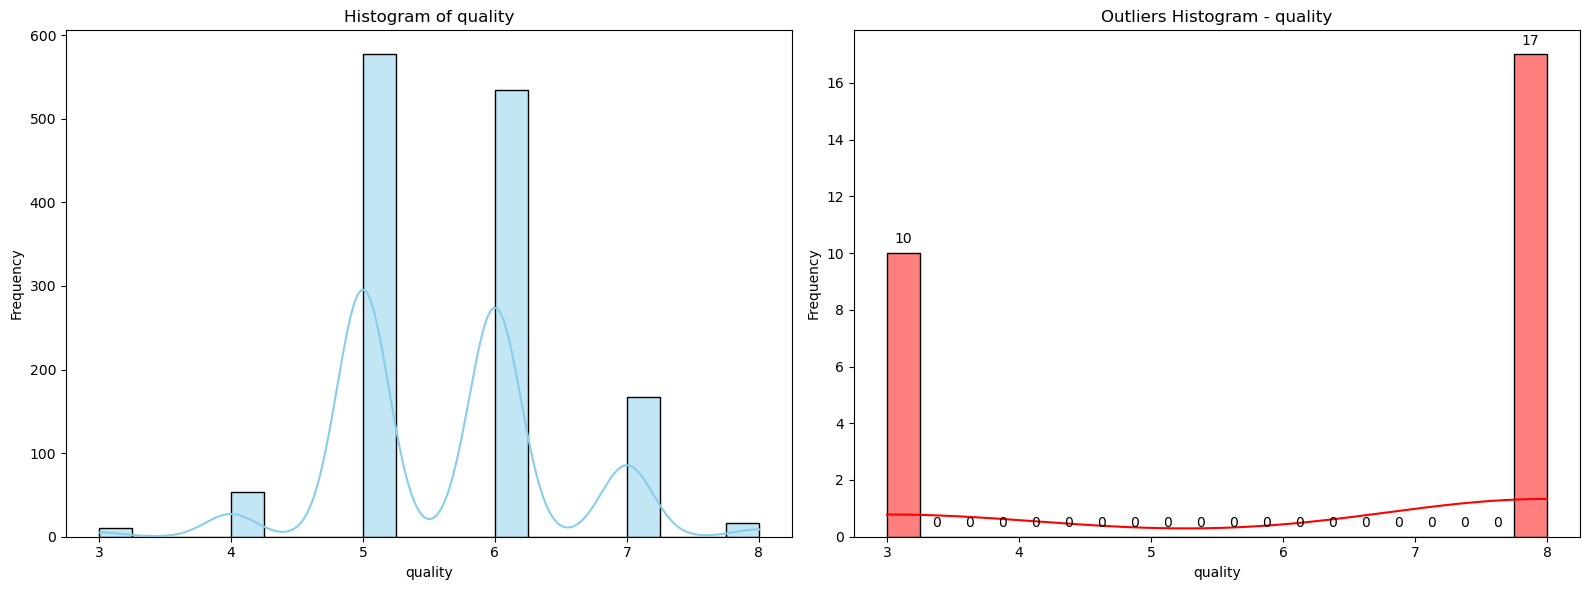

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms and outliers for each column side by side
for column_name in df1.columns:
    plt.figure(figsize=(16, 6))

    # Plot histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df1[column_name], bins=20, kde=True, color='skyblue')
    plt.title(f"Histogram of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")

    # Plot outliers histogram
    plt.subplot(1, 2, 2)
    
    # IQR 계산
    Q1 = df1[column_name].quantile(0.25)
    Q3 = df1[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 경계 정의
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 추출
    outliers = df1[(df1[column_name] < lower_bound) | (df1[column_name] > upper_bound)][column_name]

    # 이상치를 크기순으로 정렬
    sorted_outliers = outliers.sort_values()

    # 이상치 히스토그램 그리기
    sns.histplot(sorted_outliers, bins=20, kde=True, color='red')
    plt.title(f"Outliers Histogram - {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")

    # 막대 위에 y축 값 표시
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.tight_layout()
    plt.show()


# 1.4 상자그림 (이상치 분포)

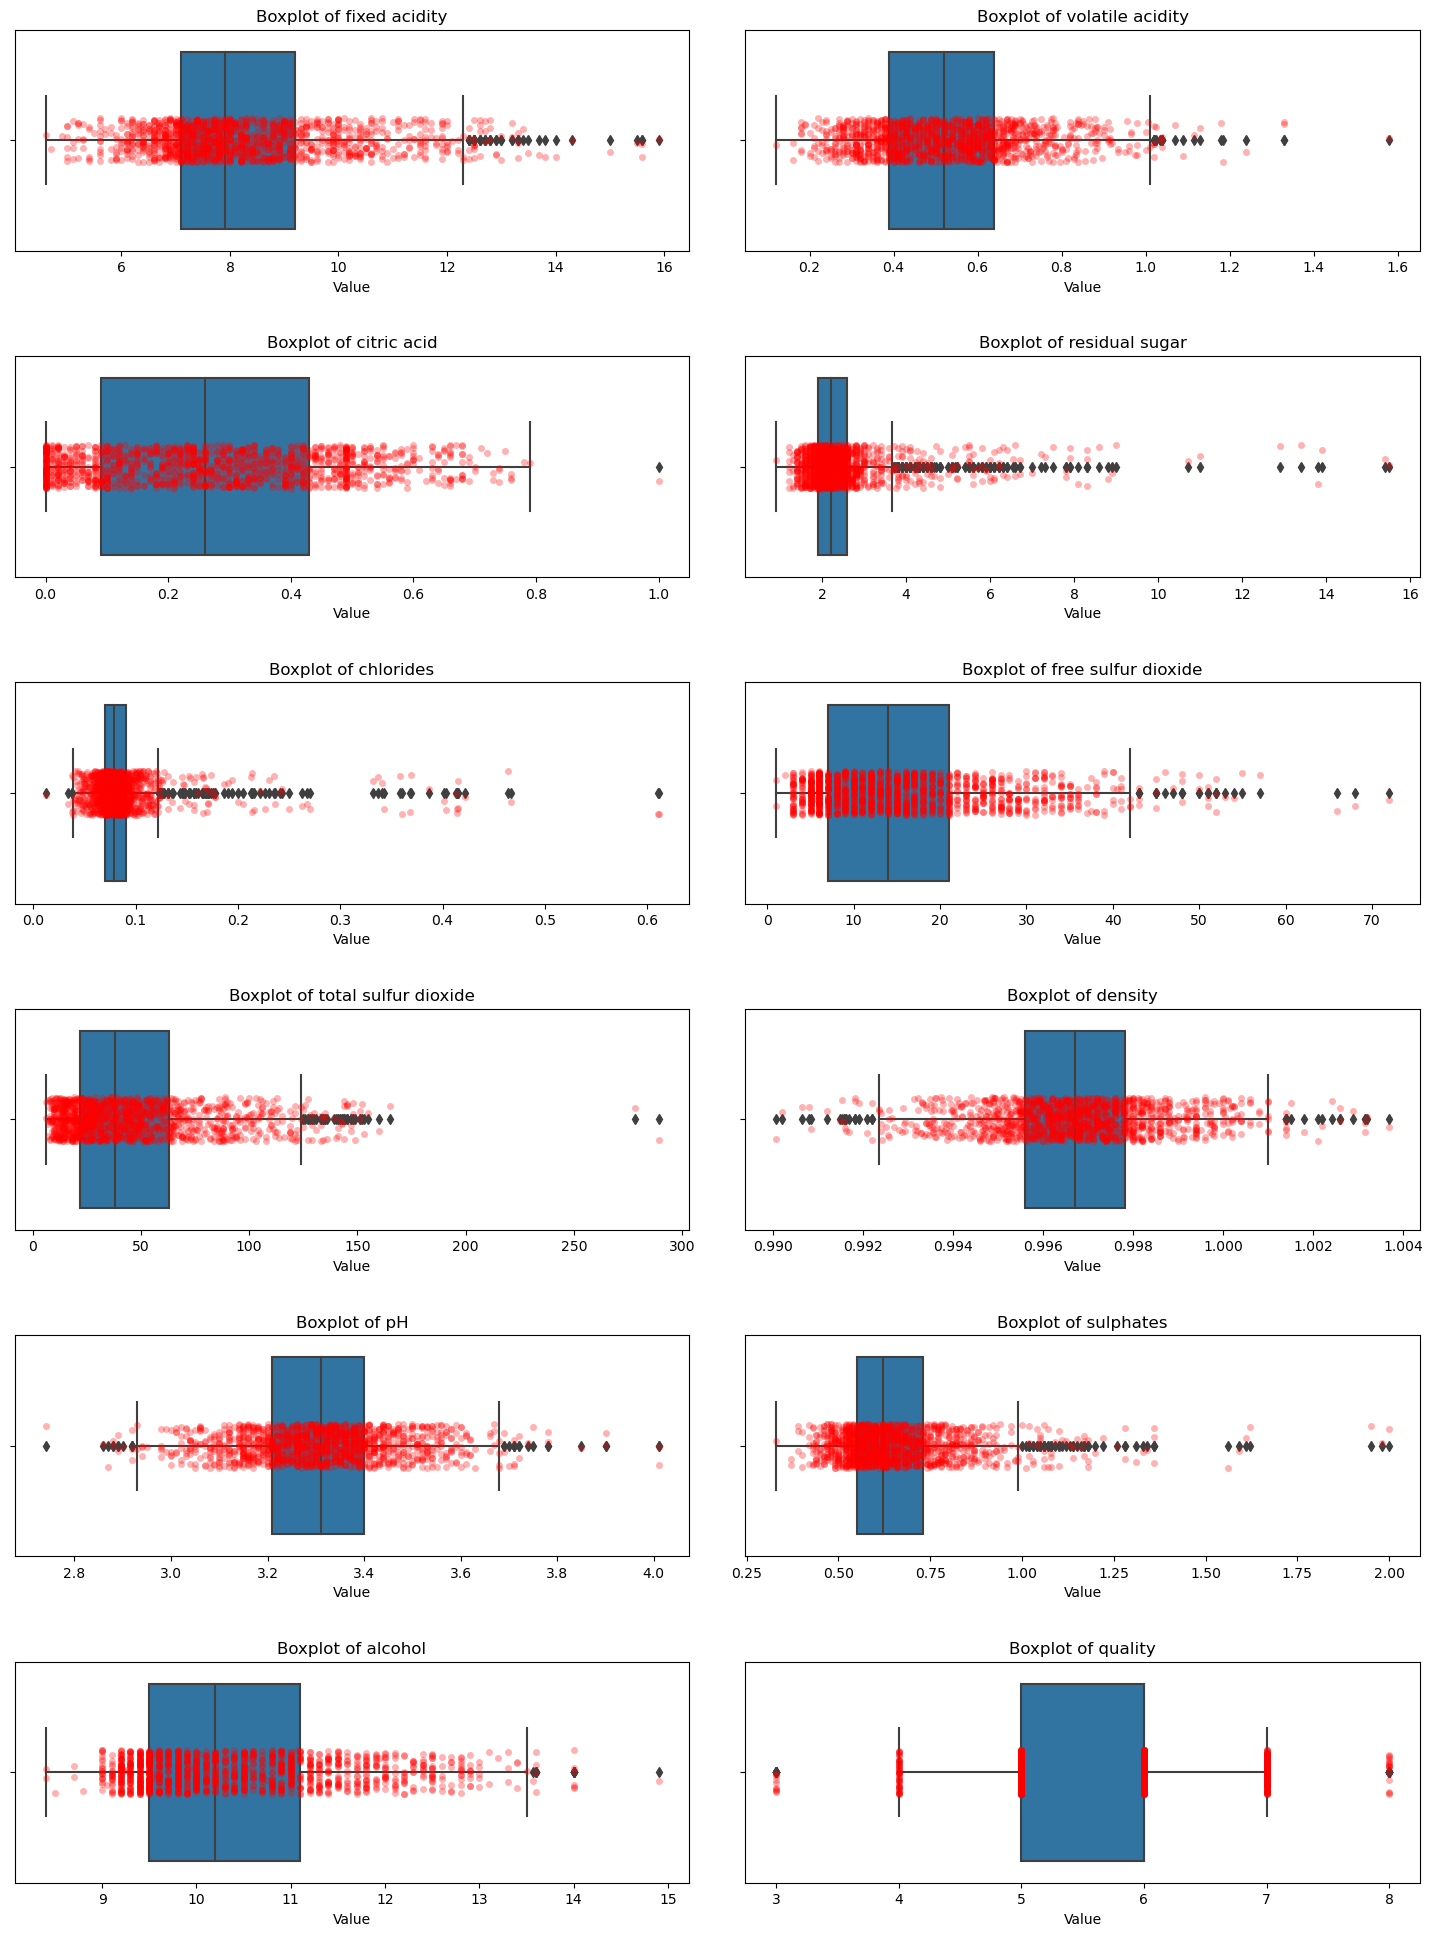

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# 그리드 생성
num_cols = len(df1.columns)
num_rows = math.ceil(num_cols / 2)  # 2열로 나누어 그리기

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 20))

# 각 열의 boxplot을 서브플롯에 그리기
for i, column in enumerate(df1.columns):
    row_index = i // 2
    col_index = i % 2
    sns.boxplot(x=df1[column], ax=axes[row_index, col_index], whis=1.5)  # whis 조절
    sns.stripplot(x=df1[column], ax=axes[row_index, col_index], color='red', marker='o', alpha=0.3)  # 이상치 마커 설정
    axes[row_index, col_index].set_title(f'Boxplot of {column}')
    axes[row_index, col_index].set_xlabel('Value')

# 남은 subplot 숨기기
for i in range(num_cols, num_rows * 2):
    fig.delaxes(axes.flatten()[i])

# 레이아웃 조정
plt.tight_layout(pad=3.0)
plt.show()


# 1.5 Violin plot

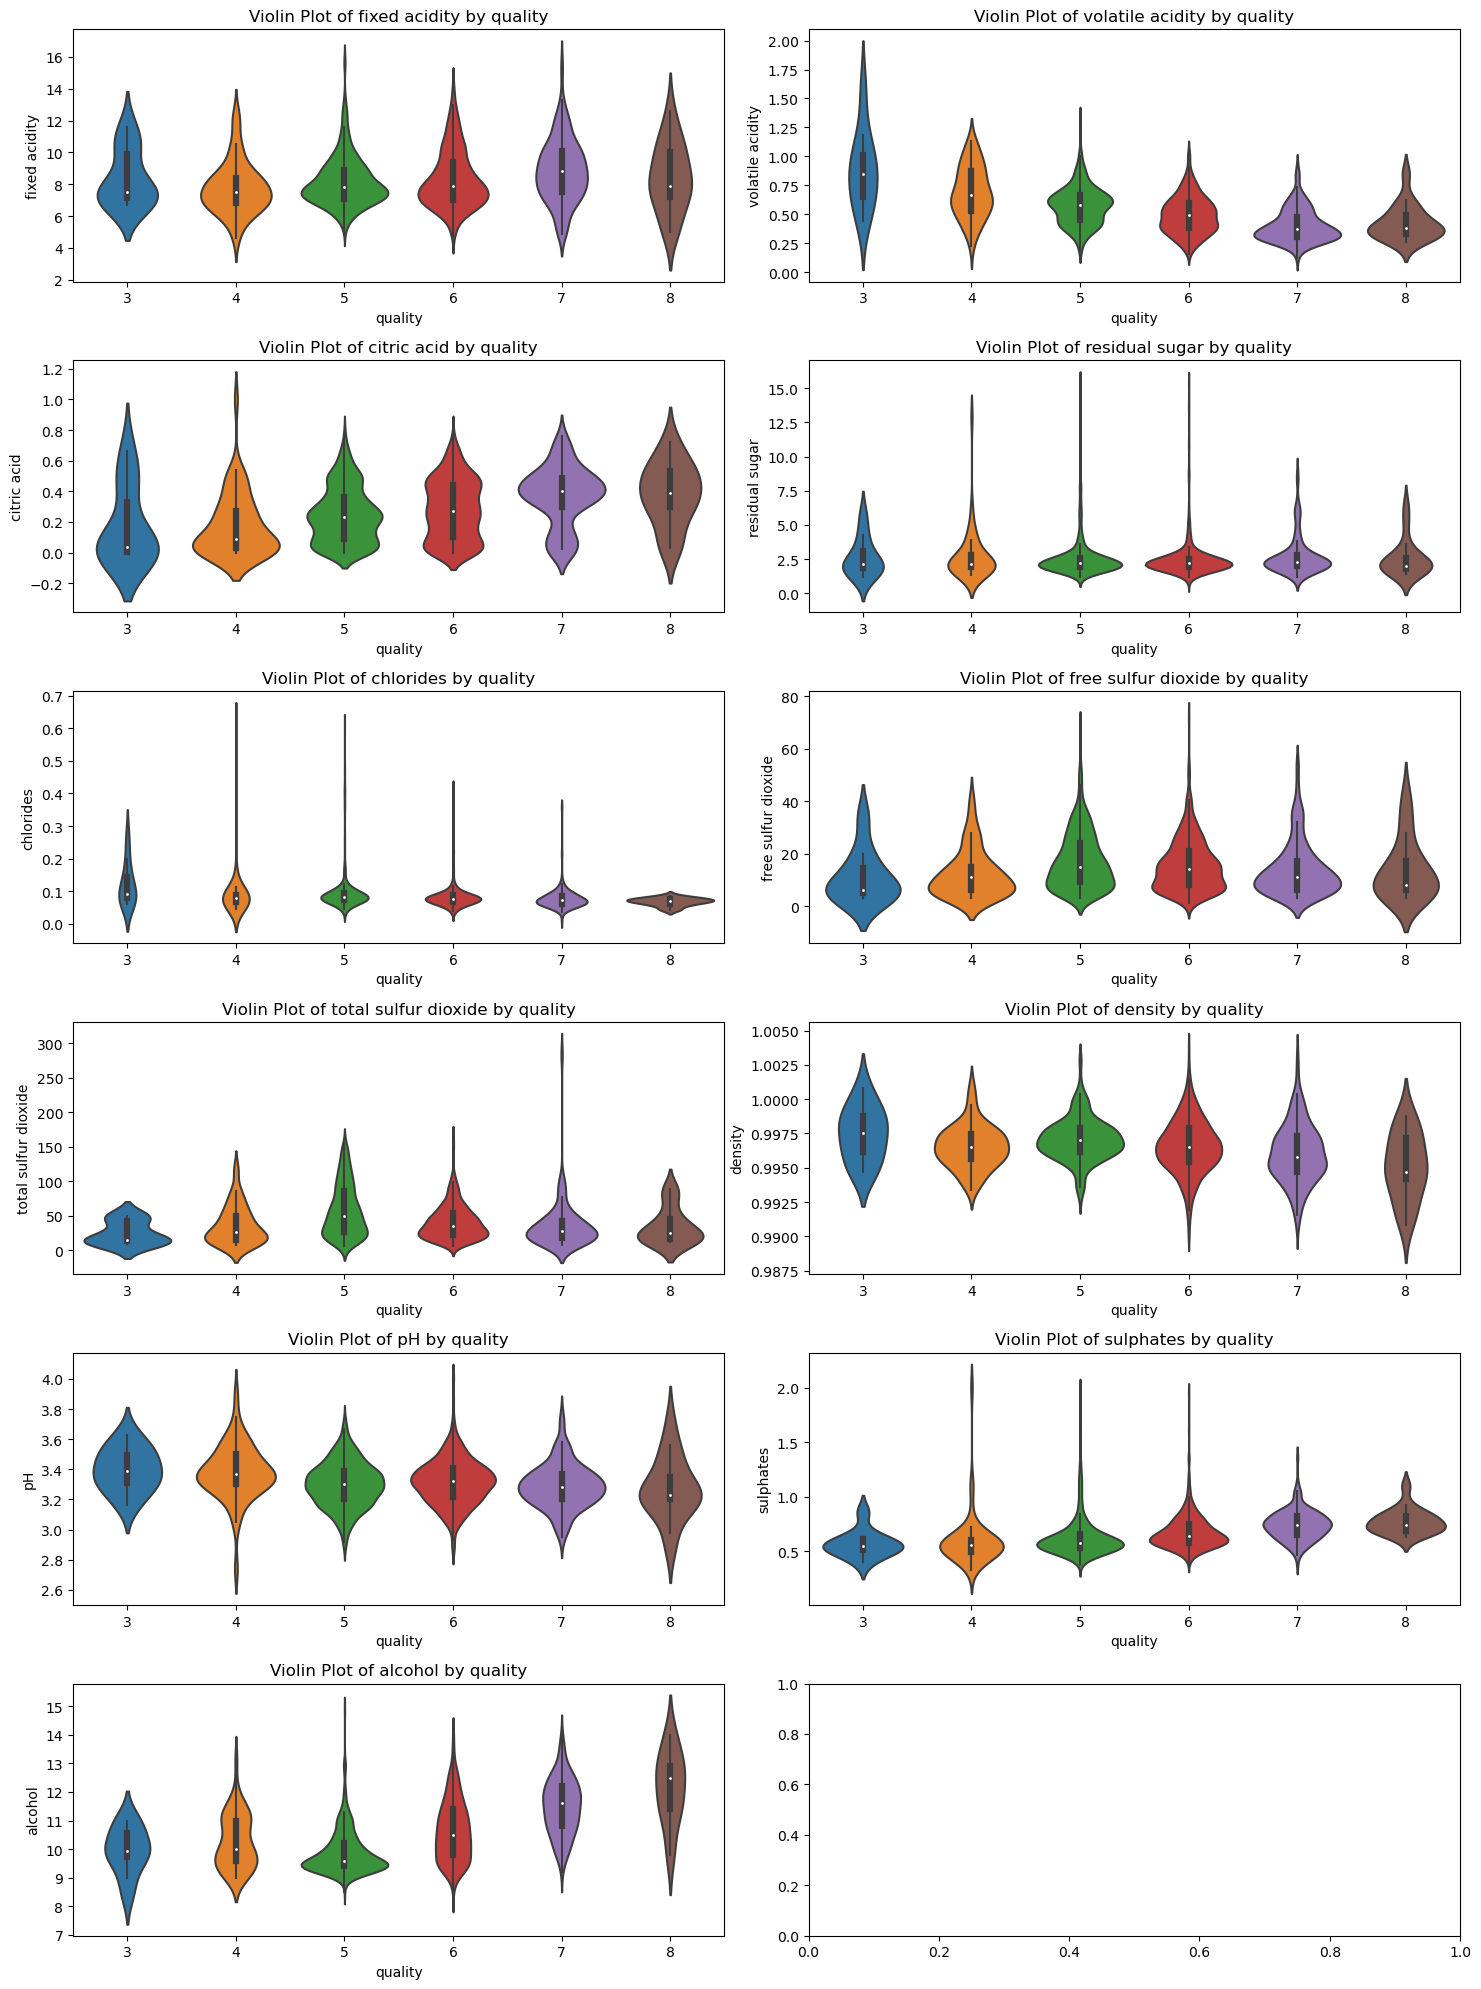

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# 그리드 생성
num_cols = len(df1.columns)
num_rows = math.ceil(num_cols / 2)  # 2열로 나누어 그리기

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 20))

# 각 열의 독립변수들의 violin plot을 서브플롯에 그리기
for i, column in enumerate(df1.columns[:-1]):  # 마지막 열은 종속 변수이므로 제외
    row_index = i // 2
    col_index = i % 2
    sns.violinplot(x=df1[df1.columns[-1]], y=df1[column], ax=axes[row_index, col_index])  # violin plot 그리기
    axes[row_index, col_index].set_title(f'Violin Plot of {column} by {df1.columns[-1]}')
    axes[row_index, col_index].set_xlabel(df1.columns[-1])
    axes[row_index, col_index].set_ylabel(column)

# 남은 subplot 숨기기
for i in range(num_cols, num_rows * 2):
    fig.delaxes(axes.flatten()[i])

# 레이아웃 조정
plt.tight_layout()
plt.show()


# 1.6 산점도

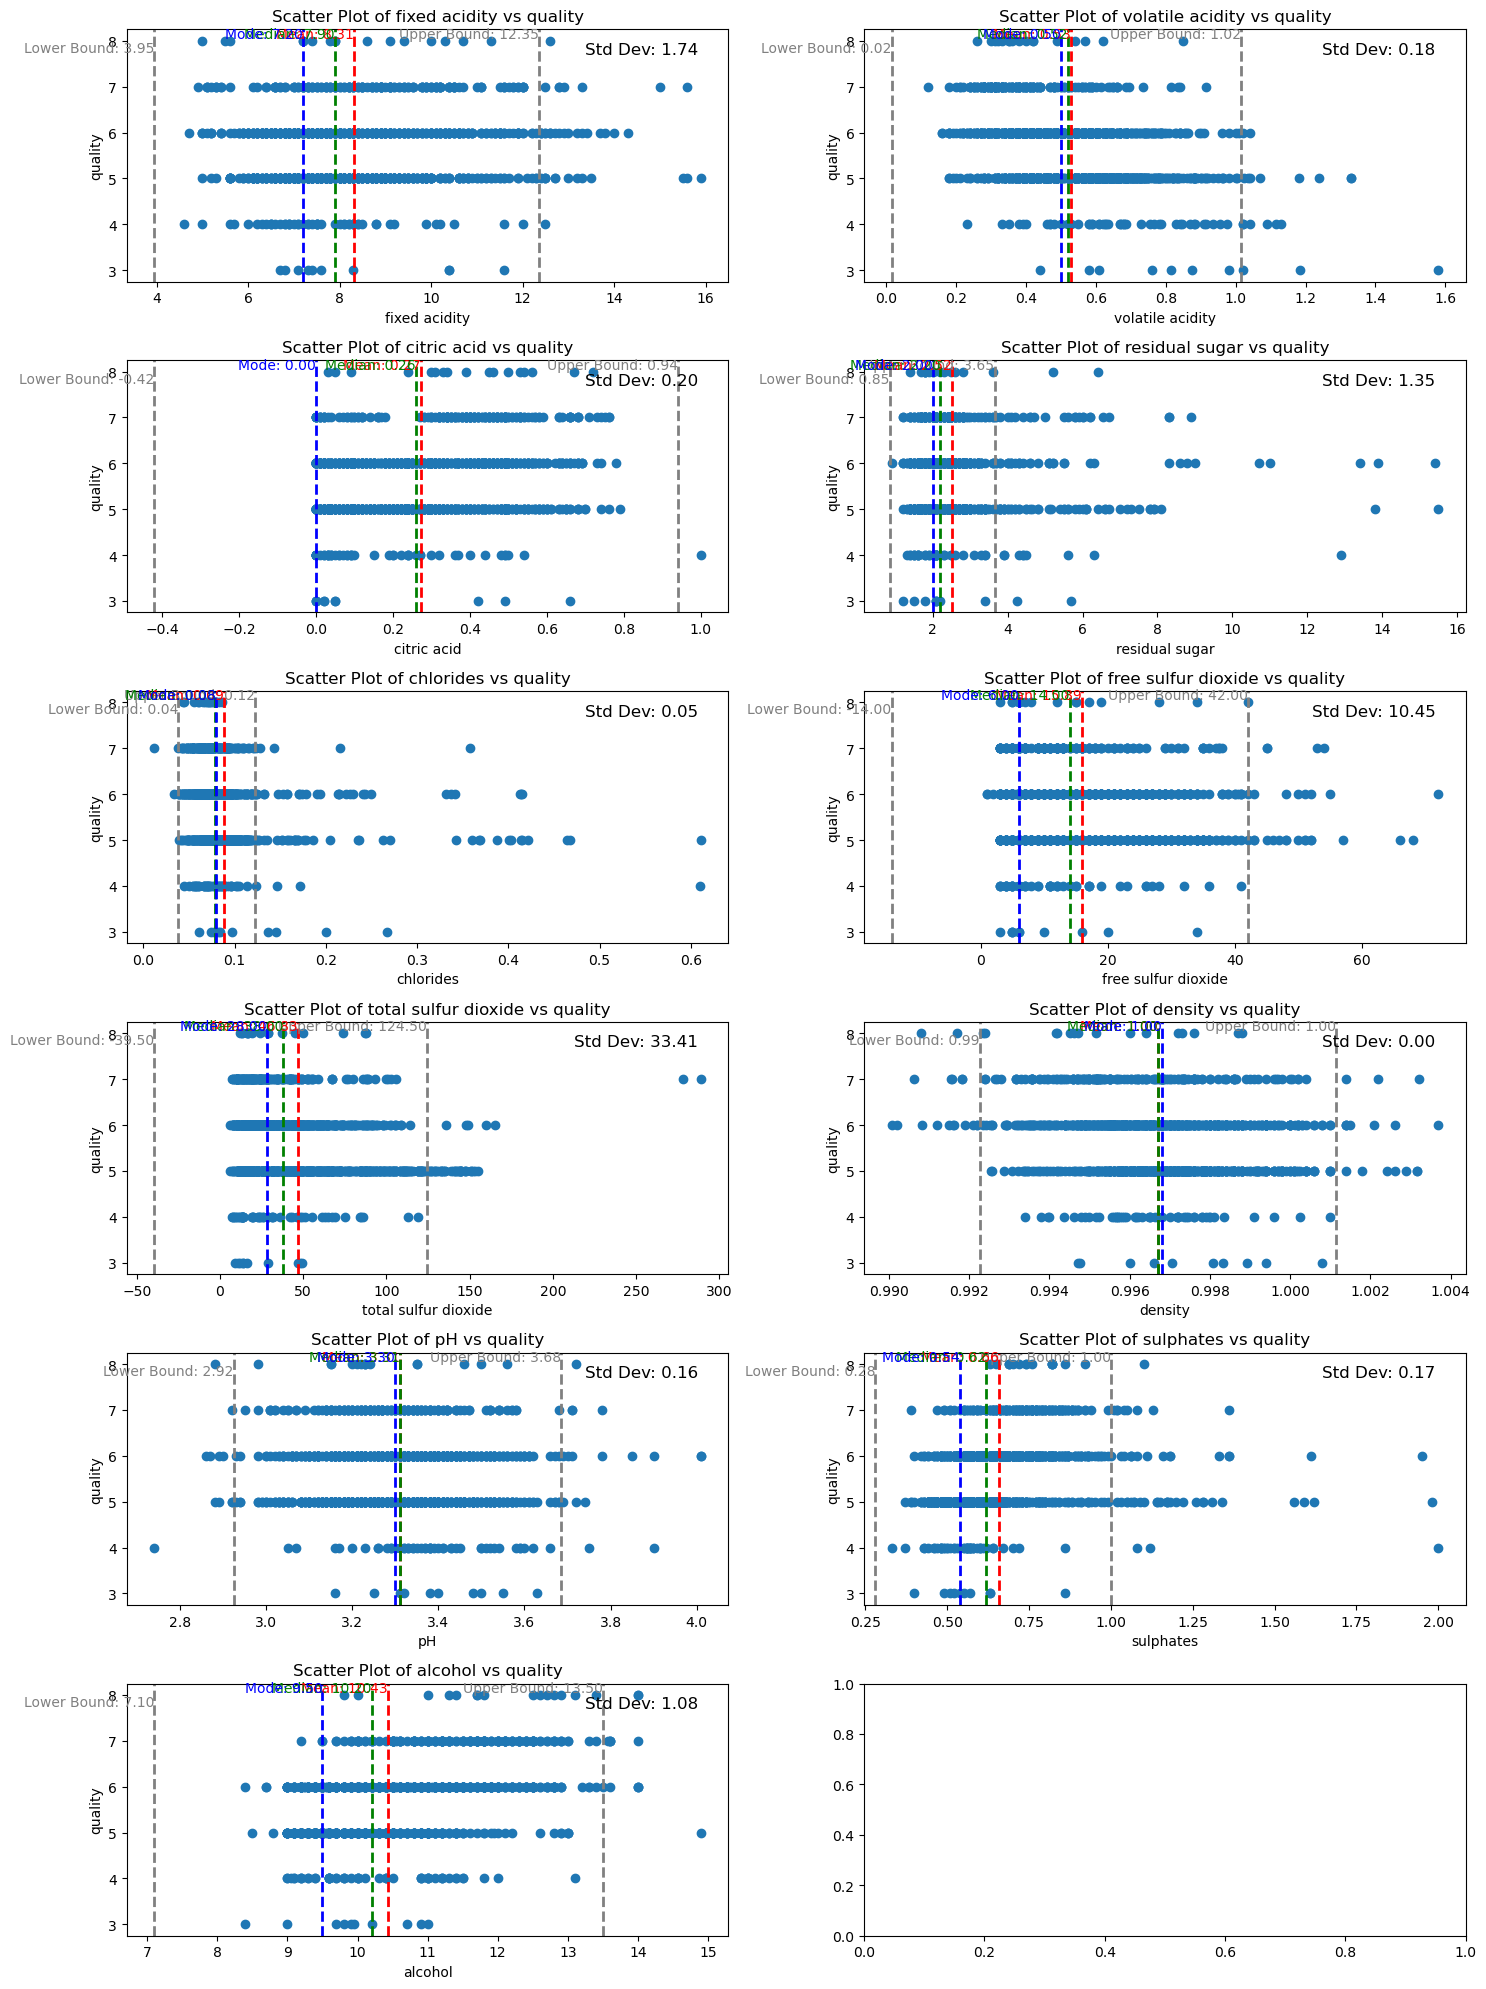

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 그리드 생성
num_cols = len(df1.columns)
num_rows = math.ceil(num_cols / 2)  # 2열로 나누어 그리기

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 20))

# 각 열의 독립변수들의 분포를 서브플롯에 그리기
for i, column in enumerate(df1.columns[:-1]):  # 마지막 열은 종속 변수이므로 제외
    row_index = i // 2
    col_index = i % 2
    ax = axes[row_index, col_index]
    
    # 산점도 그리기
    ax.scatter(df1[column], df1[df1.columns[-1]])
    ax.set_title(f'Scatter Plot of {column} vs {df1.columns[-1]}')
    ax.set_xlabel(column)
    ax.set_ylabel(df1.columns[-1])

    # 통계치 계산
    mean_val = df1[column].mean()
    median_val = df1[column].median()
    mode_val = df1[column].mode()[0]
    std_dev_val = df1[column].std()

    # IQR 계산
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1

    # 상한선과 하한선 계산
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # 상한선과 하한선을 점선으로 그리기
    ax.axvline(upper_bound, color='gray', linestyle='dashed', linewidth=2, label='Upper Bound')
    ax.axvline(lower_bound, color='gray', linestyle='dashed', linewidth=2, label='Lower Bound')

    # 통계치를 히스토그램 위에 선으로 표시
    ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(median_val, color='green', linestyle='dashed', linewidth=2, label='Median')
    ax.axvline(mode_val, color='blue', linestyle='dashed', linewidth=2, label='Mode')

    # 표준편차 값을 히스토그램 오른쪽 상단에 텍스트로 표시
    ax.text(0.95, 0.95, f'Std Dev: {std_dev_val:.2f}', transform=ax.transAxes, ha='right', va='top', fontsize=12)

    # 상한선과 하한선 값 표시
    ax.text(upper_bound, df1[df1.columns[-1]].max(), f'Upper Bound: {upper_bound:.2f}', color='gray', fontsize=10, ha='right', va='bottom', rotation=0)
    ax.text(lower_bound, df1[df1.columns[-1]].max(), f'Lower Bound: {lower_bound:.2f}', color='gray', fontsize=10, ha='right', va='top', rotation=0)

    # 통계치 이름 표시
    ax.text(mean_val, df1[df1.columns[-1]].max(), f'Mean: {mean_val:.2f}', color='red', fontsize=10, ha='right', va='bottom', rotation=0)
    ax.text(median_val, df1[df1.columns[-1]].max(), f'Median: {median_val:.2f}', color='green', fontsize=10, ha='right', va='bottom', rotation=0)
    ax.text(mode_val, df1[df1.columns[-1]].max(), f'Mode: {mode_val:.2f}', color='blue', fontsize=10, ha='right', va='bottom', rotation=0)

# 남은 subplot 숨기기
for i in range(num_cols, num_rows * 2):
    fig.delaxes(axes.flatten()[i])

# 레이아웃 조정
plt.tight_layout()
plt.show()


# 2. 이상치 판단

# 2.1 이상치 판단 방법별 분리

# 2.1.1이상치가 아니지만 주관적으로 판단하여 이상치를 정상 범주에 넣은 변수(파랑, 초록, 빨강)
- 상자그림과 히스토그램을 통해 이상치지만 일부 범위 이상치를 정상 범위로 포함하고(초록) 나머지 부분(빨강)은 이상치 처리를 한다.

- fixed acidity

- volatile acidity

- residual sugar

- total sulfur dioxide

- sulphates
------------------------------------------------------------------------------

# 2.1.2 주관적 판단하지 않은 이상치를 가지는 변수(파랑, 빨강)
- 상자그림과 히스토그램을 비교해서 굳이 이상치를 정상범위에 넣을 필요가 없다고 판단

- citric acid

- free sulfur dioxide

- alcohol
------------------------------------------------------------------------------

# 2.1.3 Z score 통해 이상치 판단
- Z score를 통해 정규분포를 만들고 정규분포 전과 후의 이상치 차이를 보고 이상치를 판단함.

- pH

- density
----------------------------------------------------------------------------

# 2.1.4 규칙성을 찾아 이상치 판단
- 이상치의 정규분포를 그려 제일 이상적인 범위(정규분포가 높은것)를 판단해서 일부는 정상 범위에 포함(초록)하고 일부는 이상치 처리(빨강)함.

- Chlorides

-----------------------------------------------------------------------------

# 2.1.3 Z score 통해 이상치 판단 (pH, density)

# 2.1.3 (1) pH

In [15]:
# Min-Max 스케일링 함수
def min_max_scaling(column):
    min_val = column.min()
    max_val = column.max()
    scaled_column = (column - min_val) / (max_val - min_val)
    return scaled_column

# pH 열을 정규화
df2 = df1.copy()
df2['pH_normalized'] = min_max_scaling(df1['pH'])


# 정규화된 pH 열 확인
print(df2['pH_normalized'])

0       0.606299
1       0.362205
2       0.409449
3       0.330709
5       0.606299
          ...   
1593    0.535433
1594    0.559055
1595    0.614173
1597    0.653543
1598    0.511811
Name: pH_normalized, Length: 1359, dtype: float64


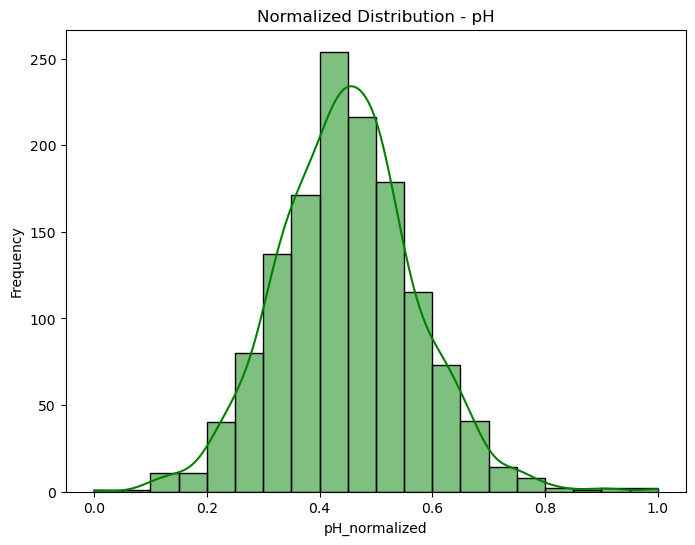

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 정규화된 pH 열의 히스토그램 그리기
plt.figure(figsize=(8, 6))
sns.histplot(df2['pH_normalized'], bins=20, kde=True, color='green')
plt.title("Normalized Distribution - pH")
plt.xlabel("pH_normalized")
plt.ylabel("Frequency")
plt.show()

In [18]:
from scipy.stats import zscore

# Z-score를 계산하여 이상치를 판별할 열 선택
column_for_detection = 'pH_normalized'

# Z-score 계산
z_scores = zscore(df2[column_for_detection])

# 이상치를 판별할 Z-score 임계값 설정 (일반적으로 2나 3을 사용)
z_threshold = 3

# Z-score가 임계값을 초과하는 행 선택
outliers = df2[abs(z_scores) > z_threshold]

# 결과 출력: pH 열의 이상치 값과 인덱스만 출력
print("Detected Outliers in pH:")
for index, value in outliers[['pH', 'pH_normalized']].iterrows():
    print(f"Index: {index}, pH Value: {value['pH']}, Normalized pH Value: {value['pH_normalized']}")


Detected Outliers in pH:
Index: 45, pH Value: 3.9, Normalized pH Value: 0.9133858267716536
Index: 95, pH Value: 3.85, Normalized pH Value: 0.8740157480314963
Index: 151, pH Value: 2.74, Normalized pH Value: 0.0
Index: 695, pH Value: 3.9, Normalized pH Value: 0.9133858267716536
Index: 1111, pH Value: 3.78, Normalized pH Value: 0.8188976377952756
Index: 1300, pH Value: 3.78, Normalized pH Value: 0.8188976377952756
Index: 1316, pH Value: 4.01, Normalized pH Value: 1.0
Index: 1321, pH Value: 4.01, Normalized pH Value: 1.0


# 2.1.3 (2) density

In [19]:
# Min-Max 스케일링 함수
def min_max_scaling(column):
    min_val = column.min()
    max_val = column.max()
    scaled_column = (column - min_val) / (max_val - min_val)
    return scaled_column

# pH 열을 정규화
df3 = df1.copy()
df3['density_normalized'] = min_max_scaling(df1['density'])


# 정규화된 pH 열 확인
print(df3['density_normalized'])

0       0.567548
1       0.494126
2       0.508811
3       0.582232
5       0.567548
          ...   
1593    0.472834
1594    0.354626
1595    0.370778
1597    0.396476
1598    0.397944
Name: density_normalized, Length: 1359, dtype: float64


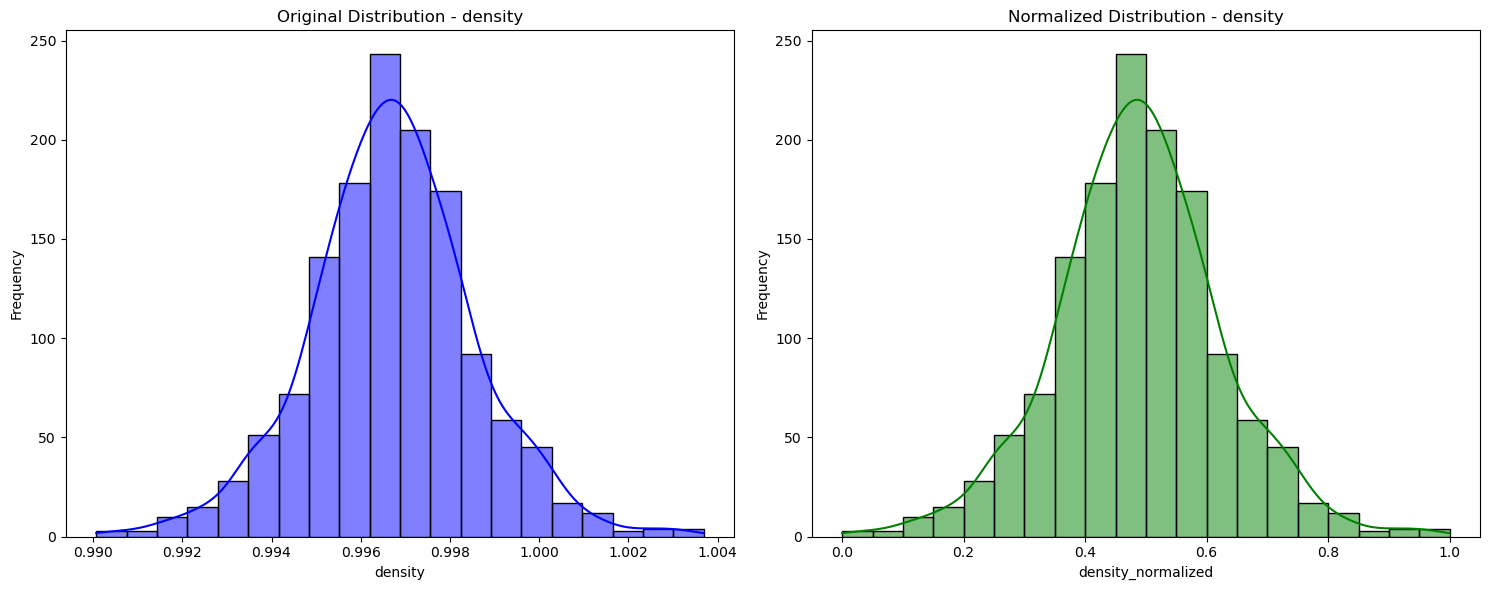

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 정규화 전의 히스토그램
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df1['density'], bins=20, kde=True, color='blue')
plt.title("Original Distribution - density")
plt.xlabel("density")
plt.ylabel("Frequency")

# 정규화 후의 히스토그램
plt.subplot(1, 2, 2)
sns.histplot(df3['density_normalized'], bins=20, kde=True, color='green')
plt.title("Normalized Distribution - density")
plt.xlabel("density_normalized")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [21]:
from scipy.stats import zscore

# Z-score를 계산하여 이상치를 판별할 열 선택
column_for_detection = 'density_normalized'

# Z-score 계산
z_scores = zscore(df3[column_for_detection])

# 이상치를 판별할 Z-score 임계값 설정 (일반적으로 2나 3을 사용)
z_threshold = 3

# Z-score가 임계값을 초과하는 행 선택
outliers = df3[abs(z_scores) > z_threshold]

# 결과 출력: pH 열의 이상치 값과 인덱스만 출력
print("Detected Outliers in density:")
for index, value in outliers[['density', 'density_normalized']].iterrows():
    print(f"Index: {index}, density Value: {value['density']}, Normalized density Value: {value['density_normalized']}")


Detected Outliers in density:
Index: 442, density Value: 1.0032, Normalized density Value: 0.964023494860508
Index: 480, density Value: 1.0026, Normalized density Value: 0.9199706314243731
Index: 554, density Value: 1.00315, Normalized density Value: 0.96035242290749
Index: 557, density Value: 1.00315, Normalized density Value: 0.96035242290749
Index: 608, density Value: 1.0026, Normalized density Value: 0.9199706314243731
Index: 836, density Value: 0.99064, Normalized density Value: 0.04185022026431431
Index: 889, density Value: 1.00289, Normalized density Value: 0.9412628487518419
Index: 1017, density Value: 0.99007, Normalized density Value: 0.0
Index: 1114, density Value: 0.9902, Normalized density Value: 0.009544787077824067
Index: 1269, density Value: 0.9908, Normalized density Value: 0.05359765051395083
Index: 1270, density Value: 0.99084, Normalized density Value: 0.056534508076362
Index: 1434, density Value: 1.00369, Normalized density Value: 1.0
Index: 1474, density Value: 1.

# 2.1.4 규칙성을 찾아 이상치 판단(Chlorides)

Cumulative Distribution of Outliers in column 'Chlorides' :
Number of outliers: 87
0.03850000000000002 0.12249999999999998


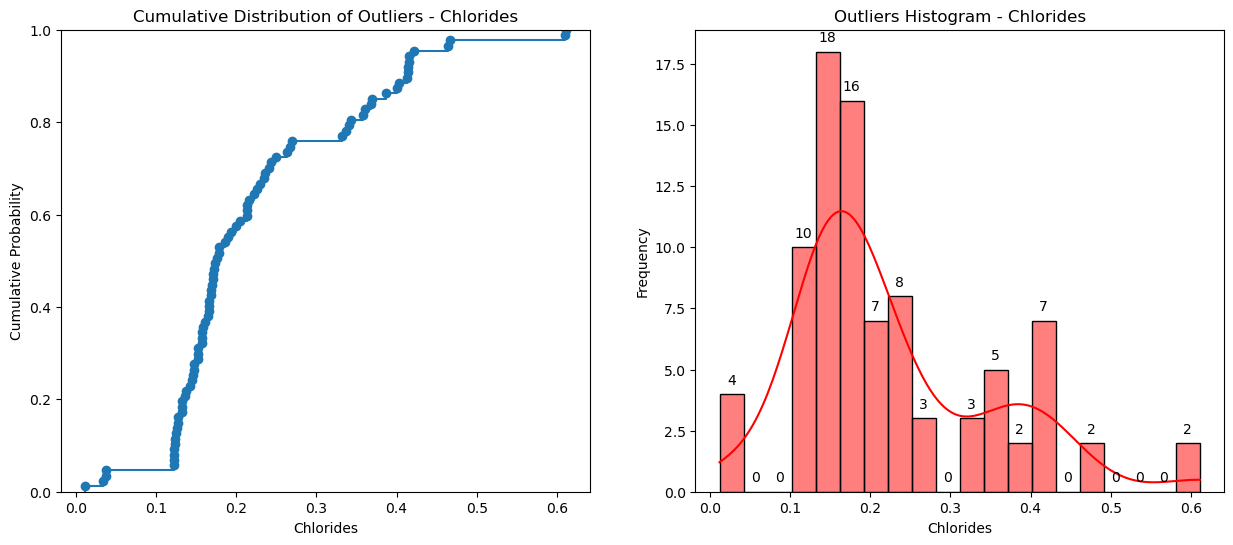

In [25]:
# 이상치 누적분포 함수 & 이상치의 히스토그램

print(f"Cumulative Distribution of Outliers in column 'Chlorides' :")
    

# IQR 계산
Q1 = df1['chlorides'].quantile(0.25)
Q3 = df1['chlorides'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 추출
chlorides_outliers = df1[(df1['chlorides'] < lower_bound) | (df1['chlorides'] > upper_bound)]['chlorides']
 
# 이상치를 제거한 DataFrame 생성
df1_no_outliers = df1[(df1['chlorides'] >= lower_bound) & (df1['chlorides'] <= upper_bound)]['chlorides']   
    
# 이상치를 제거한 DataFrame 크기순으로 정렬
sorted_outliers = chlorides_outliers.sort_values()

# 이상치 개수 출력
outlier_count = sorted_outliers.count()
print(f"Number of outliers: {outlier_count}")
    
# 이상치 누적분포 함수 그리기
plt.figure(figsize=(15, 6))
    
plt.subplot(1, 2, 1)  # 그리드 1행 2열 중 첫 번째 subplot
sns.ecdfplot(sorted_outliers, marker='o', linestyle='-')
plt.title(f"Cumulative Distribution of Outliers - Chlorides")
plt.xlabel('Chlorides')
plt.ylabel("Cumulative Probability")
    
plt.subplot(1, 2, 2)  # 그리드 1행 2열 중 두 번째 subplot
ax = sns.histplot(sorted_outliers, bins=20, kde=True, color='red')
plt.title(f"Outliers Histogram - Chlorides")
plt.xlabel('Chlorides')
plt.ylabel("Frequency")

for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        
    
print(lower_bound,upper_bound)

In [27]:
df1_no_outliers

0       0.076
1       0.098
2       0.092
3       0.075
5       0.075
        ...  
1593    0.068
1594    0.090
1595    0.062
1597    0.075
1598    0.067
Name: chlorides, Length: 1272, dtype: float64

In [28]:
# 이상치를 임의로 모두 제거한 데이터프레임
# 정규성 검사
from scipy.stats import shapiro
import numpy as np

# 샤피로-윌크 검정 수행
statistic, p_value = shapiro(df1_no_outliers)

# 결과 출력
print(f"Shapiro-Wilk Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# P-value를 기준으로 귀무가설의 기각 여부 판단
alpha = 0.05
if p_value > alpha:
    print("데이터는 정규 분포를 따릅니다. (귀무가설을 기각하지 않음)")
else:
    print("데이터는 정규 분포를 따르지 않습니다. (귀무가설을 기각)")

Shapiro-Wilk Test Statistic: 0.9904307126998901
P-value: 2.2911294195182563e-07
데이터는 정규 분포를 따르지 않습니다. (귀무가설을 기각)


In [29]:
#이상치 추출 데이터프레임
#정규성 검사

# 샤피로-윌크 검정 수행
statistic, p_value = shapiro(sorted_outliers)

# 결과 출력
print(f"Shapiro-Wilk Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# P-value를 기준으로 귀무가설의 기각 여부 판단
alpha = 0.05
if p_value > alpha:
    print("데이터는 정규 분포를 따릅니다. (귀무가설을 기각하지 않음)")
else:
    print("데이터는 정규 분포를 따르지 않습니다. (귀무가설을 기각)")

Shapiro-Wilk Test Statistic: 0.8841235041618347
P-value: 1.1971534377153148e-06
데이터는 정규 분포를 따르지 않습니다. (귀무가설을 기각)


In [30]:
# 평균, 표준편차, 최소, 최대, 사분위값
sorted_outliers.describe()

count    87.000000
mean      0.224862
std       0.121294
min       0.012000
25%       0.146500
50%       0.176000
75%       0.268500
max       0.611000
Name: chlorides, dtype: float64

In [31]:
# 이상치 비율
chlorides_outliers.rate = sorted_outliers.count()/df1['chlorides'].count()
print("전체 Chlorides 이상치 비율 :", chlorides_outliers.rate)

전체 Chlorides 이상치 비율 : 0.0640176600441501


In [34]:
import pandas as pd
from scipy.stats import shapiro
import numpy as np

# Series에서 수치 0.2를 기준으로 이하의 값을 가지는 데이터만 남기기
threshold = 0.2
outliers_to_add = sorted_outliers[sorted_outliers > threshold]
filtered_series = df1_no_outliers.append(outliers_to_add).sort_values()

# 정규성 검정 수행
statistic, p_value = shapiro(filtered_series)

# 결과 출력
print(f"Shapiro-Wilk Test for the Series:")
print(f"  - Shapiro-Wilk Test Statistic: {statistic}")
print(f"  - P-value: {p_value}")

# P-value를 기준으로 귀무가설의 기각 여부 판단
alpha = 0.05
if p_value > alpha:
    print("    => 데이터는 정규 분포를 따릅니다 (귀무가설을 기각하지 않음)")
else:
    print("    => 데이터는 정규 분포를 따르지 않습니다 (귀무가설을 기각)")

Shapiro-Wilk Test for the Series:
  - Shapiro-Wilk Test Statistic: 0.42244064807891846
  - P-value: 0.0
    => 데이터는 정규 분포를 따르지 않습니다 (귀무가설을 기각)


C:\Users\stell\AppData\Local\Temp\ipykernel_10448\538086184.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_series = df1_no_outliers.append(outliers_to_add).sort_values()


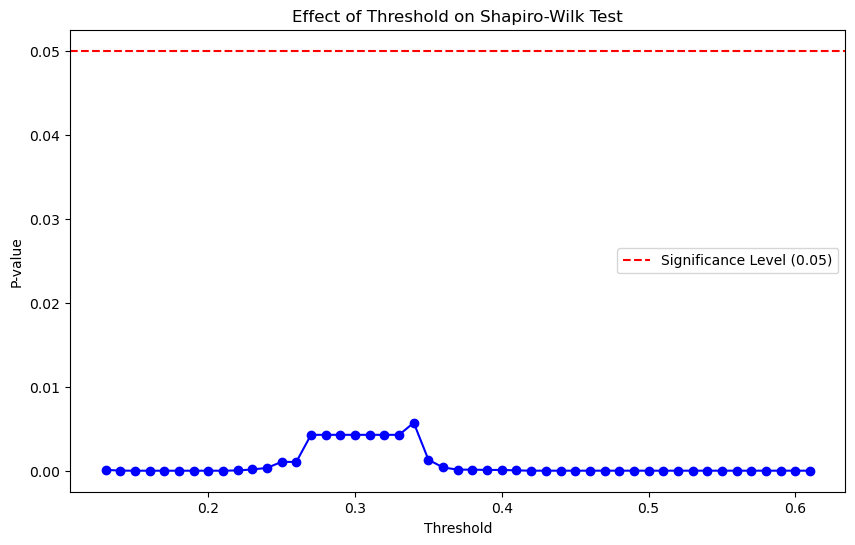

Maximum p-value: 0.0057 at threshold: 0.3400


In [36]:
# 이상치를 제거한 데이터프레임에 임계값에 대해 이상치 데이터프레임 일부를 차례로 추가하며

# 이상치 데이터프레임에 대해

# 여러 임계값에 대해 검정 수행
thresholds = np.arange(0.13, 0.62, 0.01)
p_values = []

for threshold in thresholds:
    filtered_series = sorted_outliers[sorted_outliers < threshold]
    statistic, p_value = shapiro(filtered_series)
    
    p_values.append(p_value)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(thresholds, p_values, marker='o', linestyle='-', color='b')
plt.title('Effect of Threshold on Shapiro-Wilk Test')
plt.xlabel('Threshold')
plt.ylabel('P-value')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (0.05)')
plt.legend()
plt.show()

# p-value가 최대로 출력될 때의 임계값 찾기
max_p_value_index = np.argmax(p_values)
optimal_threshold = thresholds[max_p_value_index]

# 최대 p-value와 해당하는 임계값 출력
print(f"Maximum p-value: {p_values[max_p_value_index]:.4f} at threshold: {optimal_threshold:.4f}")


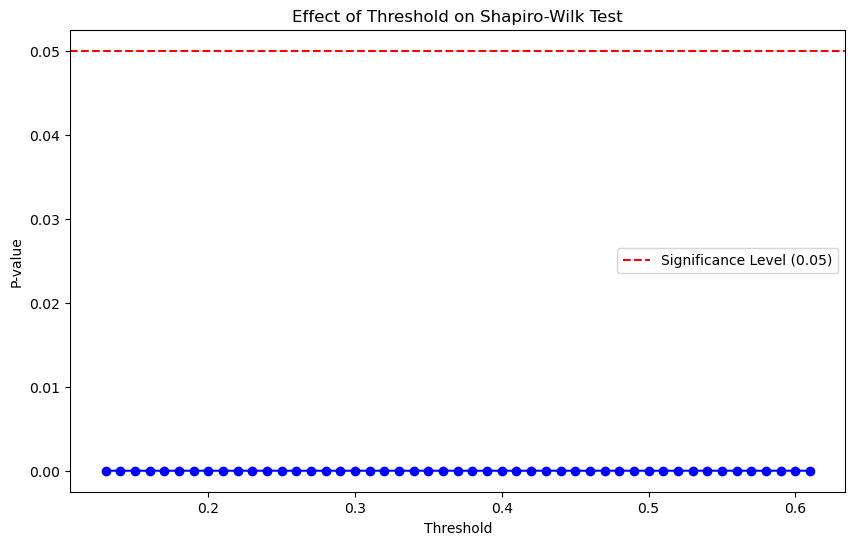

Maximum p-value: 0.0000 at threshold: 0.13


In [37]:
# 여러 임계값에 대해 검정 수행
thresholds = np.arange(0.13, 0.62, 0.01)
p_values = []

for threshold in thresholds:
    # 임계값에 해당하는 이상치 추가
    outliers_to_add = sorted_outliers[sorted_outliers < threshold]
    filtered_series = pd.concat([df1_no_outliers, pd.Series(outliers_to_add)]).sort_values()

    

    statistic, p_value = shapiro(filtered_series)
    
    p_values.append(p_value)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(thresholds, p_values, marker='o', linestyle='-', color='b')
plt.title('Effect of Threshold on Shapiro-Wilk Test')
plt.xlabel('Threshold')
plt.ylabel('P-value')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (0.05)')
plt.legend()
plt.show()

# p-value가 최대로 출력될 때의 임계값 찾기
max_p_value_index = np.argmax(p_values)
optimal_threshold = thresholds[max_p_value_index]

# 최대 p-value와 해당하는 임계값 출력
print(f"Maximum p-value: {p_values[max_p_value_index]:.4f} at threshold: {optimal_threshold:.2f}")

# 3. 이상치 산점도

# 3.1 이상치가 아니지만 주관적으로 판단하여 이상치를 정상 범주에 넣은 변수(파랑, 초록, 빨강)
- 상자그림과 히스토그램을 통해 이상치지만 일부 범위 이상치를 정상 범위로 포함하고(초록) 나머지 부분(빨강)은 이상치 처리를 한다.

- 파랑색 <= Upper_Bound < 초록색 <= Threshold < 빨간색
----------------------------------------------------------------------------
- fixed acidity

- volatile acidity

- residual sugar

- total sulfur dioxide

- sulphates

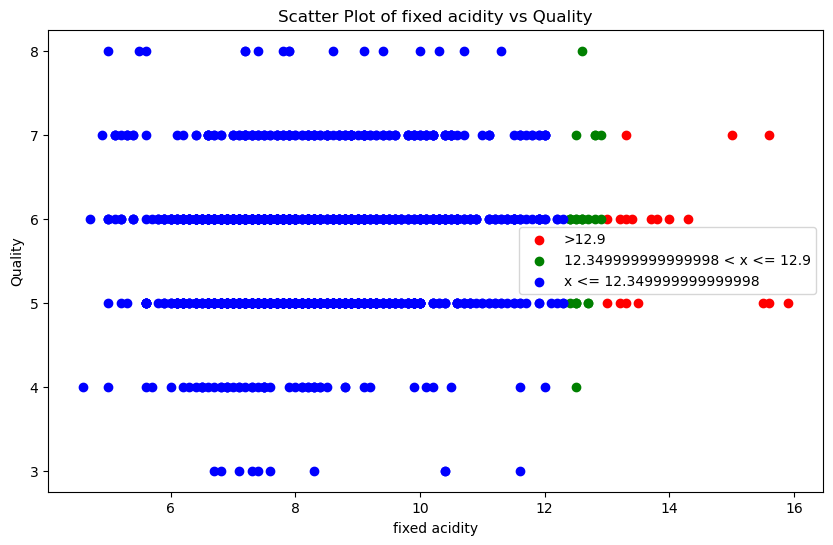

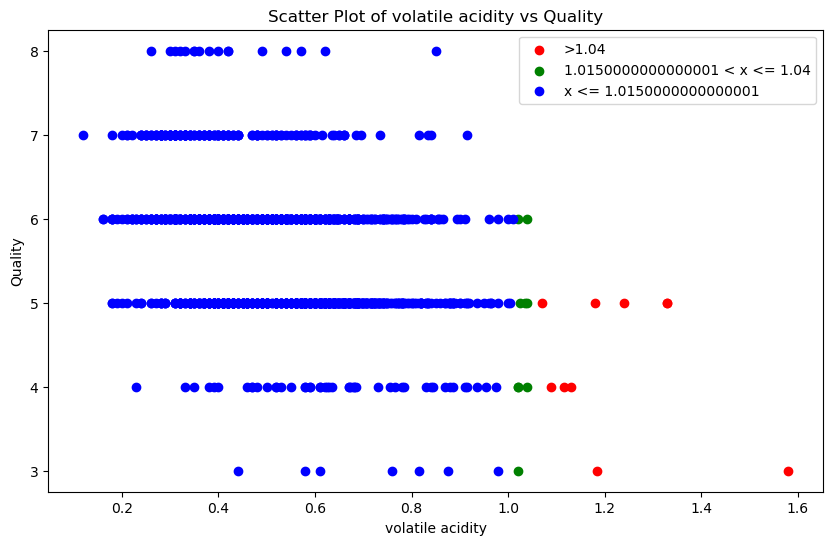

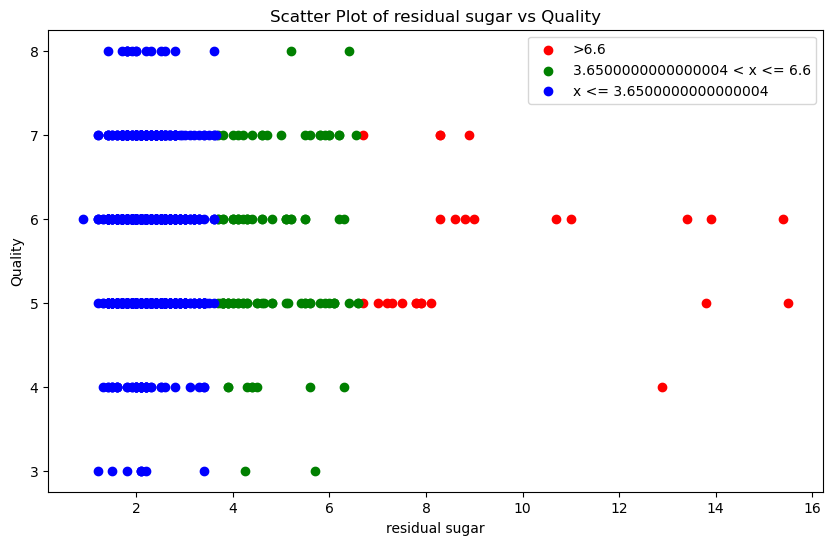

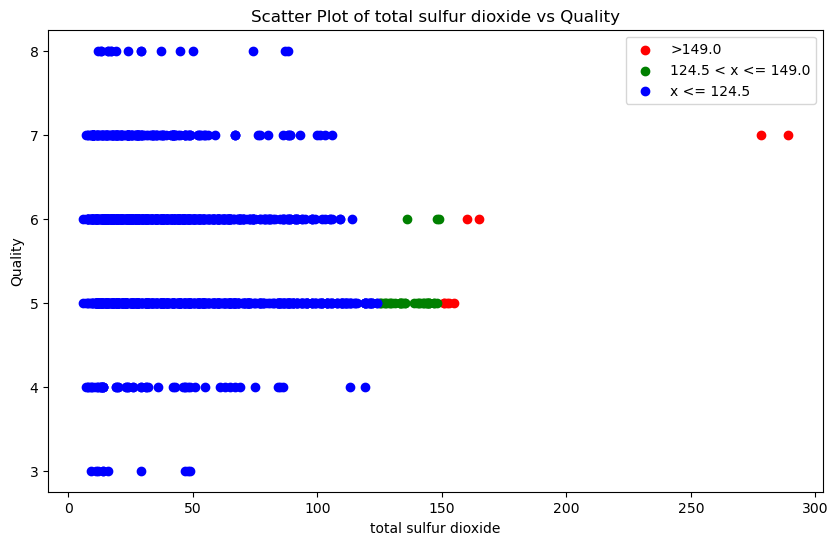

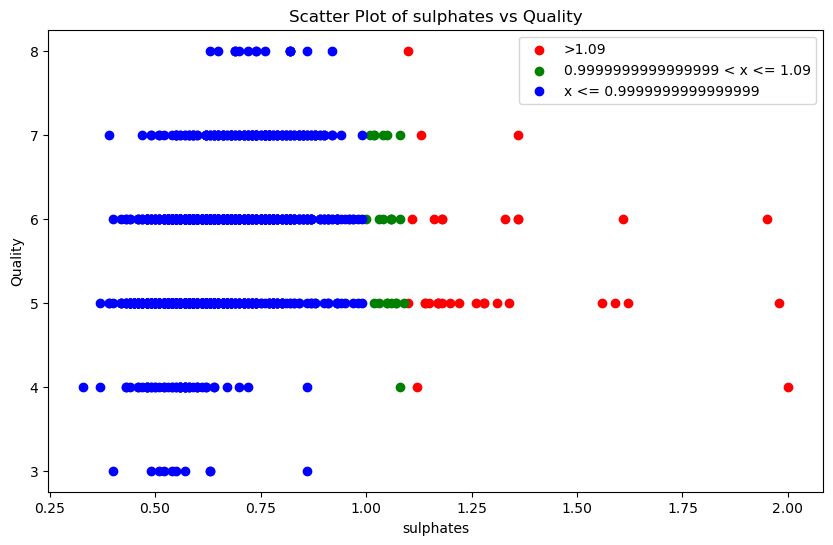

In [38]:
import matplotlib.pyplot as plt

# 산점도를 그릴 열 선택
selected_columns = ['fixed acidity', 'volatile acidity', 'residual sugar', 'total sulfur dioxide', 'sulphates']

# 각 열에 대한 임계값 및 상한값 딕셔너리 정의
criteria = {
    'fixed acidity': 12.9,
    'volatile acidity': 1.04,
    'residual sugar': 6.6,
    'total sulfur dioxide': 149.0,
    'sulphates': 1.09
}

upper_bound_values = {
    'fixed acidity': df1['fixed acidity'].quantile(0.75) + 1.5 * (df1['fixed acidity'].quantile(0.75) - df1['fixed acidity'].quantile(0.25)),
    'volatile acidity': df1['volatile acidity'].quantile(0.75) + 1.5 * (df1['volatile acidity'].quantile(0.75) - df1['volatile acidity'].quantile(0.25)),
    'residual sugar': df1['residual sugar'].quantile(0.75) + 1.5 * (df1['residual sugar'].quantile(0.75) - df1['residual sugar'].quantile(0.25)),
    'total sulfur dioxide': df1['total sulfur dioxide'].quantile(0.75) + 1.5 * (df1['total sulfur dioxide'].quantile(0.75) - df1['total sulfur dioxide'].quantile(0.25)),
    'sulphates': df1['sulphates'].quantile(0.75) + 1.5 * (df1['sulphates'].quantile(0.75) - df1['sulphates'].quantile(0.25))
}

# 각 열에 대해 반복
for column_name in selected_columns:
    # 플롯 생성
    plt.figure(figsize=(10, 6))

    # IQR 계산
    Q1 = df1[column_name].quantile(0.25)
    Q3 = df1[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 경계 정의
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 임계값 및 상한값 지정
    threshold = criteria[column_name]
    upper_bound_value = upper_bound_values[column_name]

    # 특정 조건에 맞는 데이터 선택
    red_points = df1[df1[column_name] > threshold]
    green_points = df1[(df1[column_name] > upper_bound) & (df1[column_name] <= threshold)]
    blue_points = df1[df1[column_name] <= upper_bound]

    # 빨간색 점 플롯
    plt.scatter(red_points[column_name], red_points['quality'], color='red', label=f'>{threshold}')

    # 초록색 점 플롯
    plt.scatter(green_points[column_name], green_points['quality'], color='green', label=f'{upper_bound} < x <= {threshold}')

    # 파란색 점 플롯
    plt.scatter(blue_points[column_name], blue_points['quality'], color='blue', label=f'x <= {upper_bound}')

    # 축 및 레이블 설정
    plt.xlabel(column_name)
    plt.ylabel('Quality')
    plt.title(f'Scatter Plot of {column_name} vs Quality')
    plt.legend()

    # 플롯 표시
    plt.show()

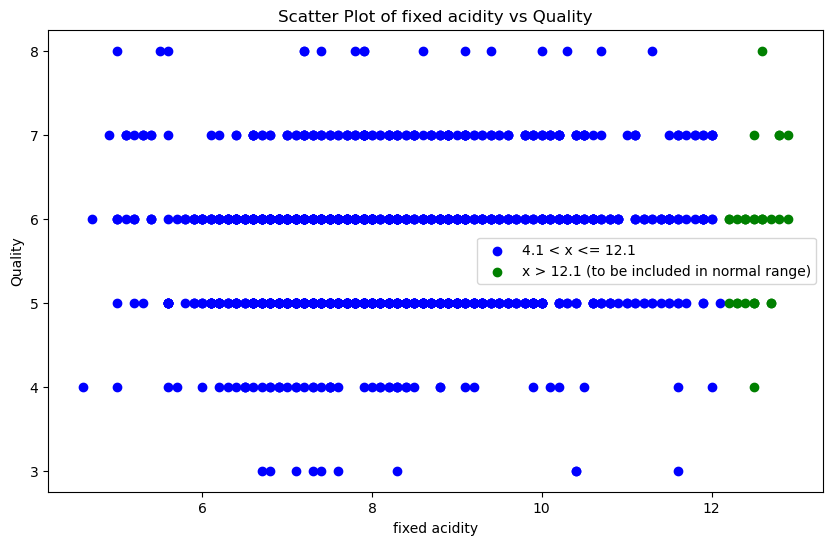

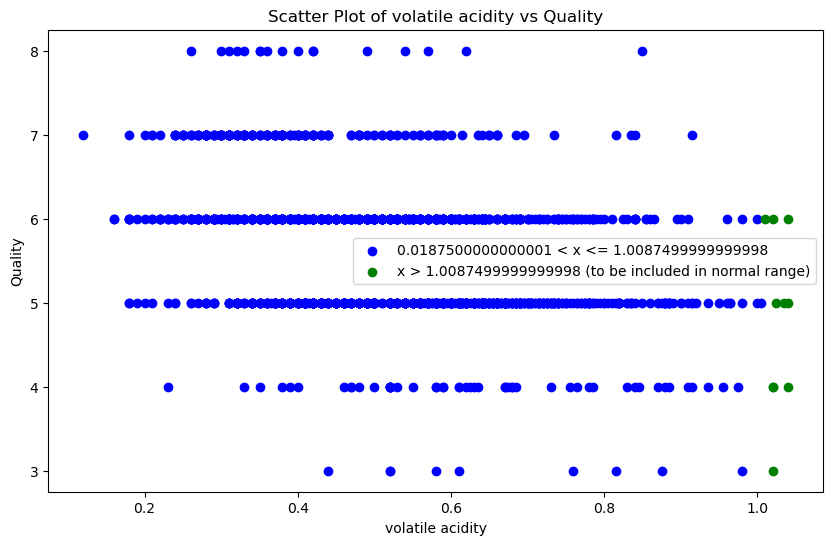

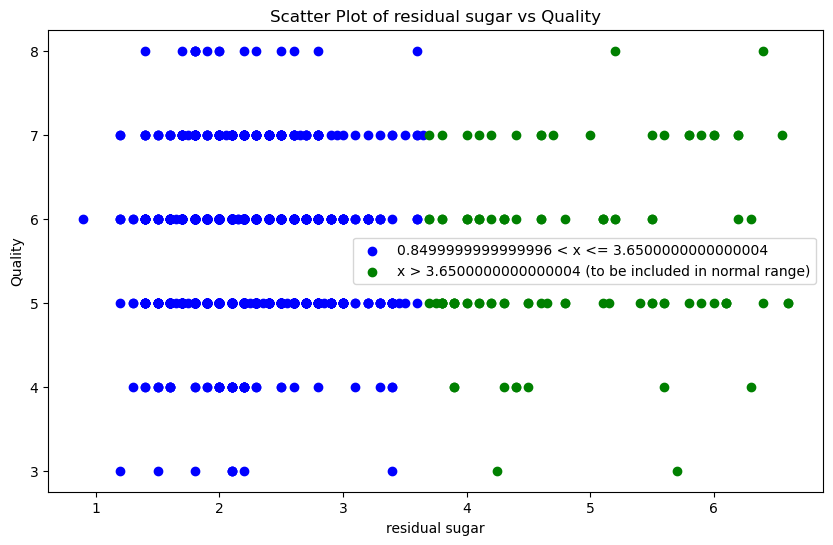

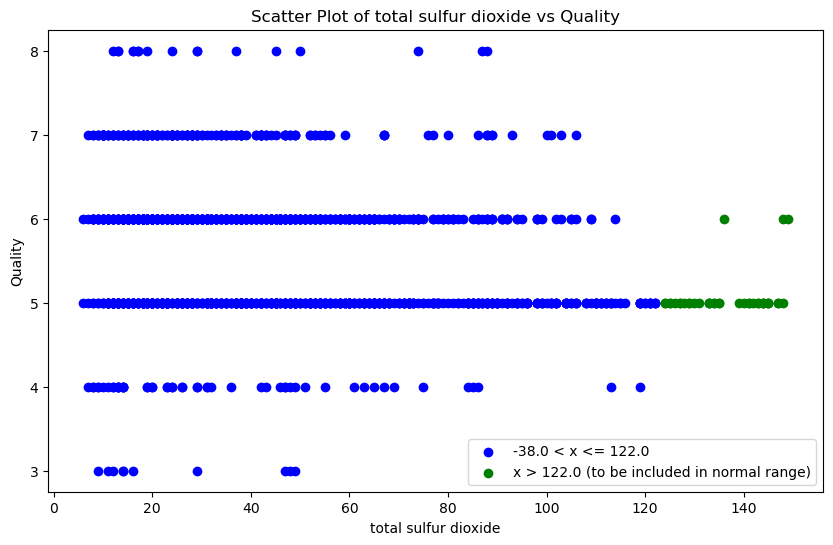

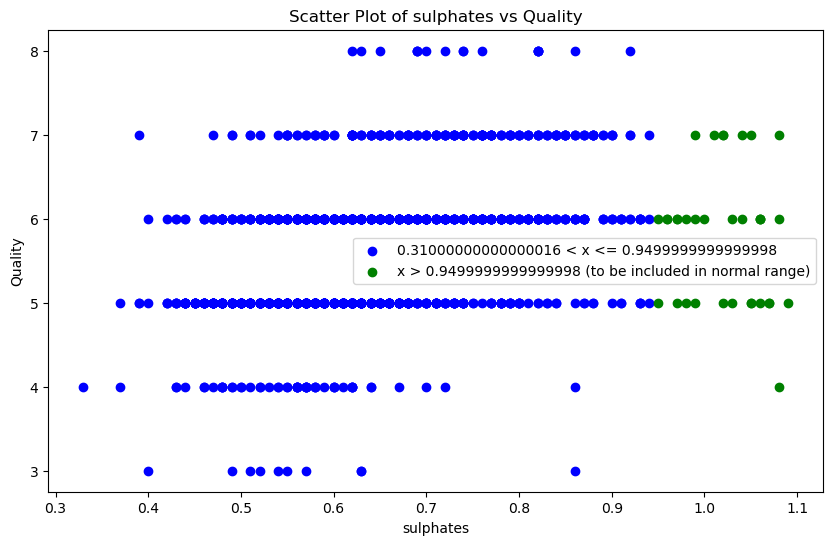

In [40]:
import matplotlib.pyplot as plt

# 산점도를 그릴 열 선택
selected_columns = ['fixed acidity', 'volatile acidity', 'residual sugar', 'total sulfur dioxide', 'sulphates']

# 각 열에 대한 임계값 및 상한값 딕셔너리 정의
criteria = {
    'fixed acidity': 12.9,
    'volatile acidity': 1.04,
    'residual sugar': 6.6,
    'total sulfur dioxide': 149.0,
    'sulphates': 1.09
}

upper_bound_values = {
    'fixed acidity': df1['fixed acidity'].quantile(0.75) + 1.5 * (df1['fixed acidity'].quantile(0.75) - df1['fixed acidity'].quantile(0.25)),
    'volatile acidity': df1['volatile acidity'].quantile(0.75) + 1.5 * (df1['volatile acidity'].quantile(0.75) - df1['volatile acidity'].quantile(0.25)),
    'residual sugar': df1['residual sugar'].quantile(0.75) + 1.5 * (df1['residual sugar'].quantile(0.75) - df1['residual sugar'].quantile(0.25)),
    'total sulfur dioxide': df1['total sulfur dioxide'].quantile(0.75) + 1.5 * (df1['total sulfur dioxide'].quantile(0.75) - df1['total sulfur dioxide'].quantile(0.25)),
    'sulphates': df1['sulphates'].quantile(0.75) + 1.5 * (df1['sulphates'].quantile(0.75) - df1['sulphates'].quantile(0.25))
}

# 각 열에 대해 반복
for column_name in selected_columns:
    # 플롯 생성
    plt.figure(figsize=(10, 6))

    # IQR 계산
    Q1 = df1[column_name].quantile(0.25)
    Q3 = df1[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 경계 정의
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 임계값 및 상한값 지정
    threshold = criteria[column_name]
    upper_bound_value = upper_bound_values[column_name]

    # 특정 조건에 맞는 데이터 선택
    normal_points = df1[(df1[column_name] > lower_bound) & (df1[column_name] <= upper_bound)]
    outlier_points = df1[df1[column_name] > upper_bound]

    # 파란색 점 플롯 (정상 범위)
    plt.scatter(normal_points[column_name], normal_points['quality'], color='blue', label=f'{lower_bound} < x <= {upper_bound}')

    # 초록색 점 플롯 (이상치로 표시되지만 정상 범위에 포함할 것)
    plt.scatter(outlier_points[column_name], outlier_points['quality'], color='green', label=f'x > {upper_bound} (to be included in normal range)')

    # 축 및 레이블 설정
    plt.xlabel(column_name)
    plt.ylabel('Quality')
    plt.title(f'Scatter Plot of {column_name} vs Quality')
    plt.legend()

    # 플롯 표시
    plt.show()


- 파랑은 정상범위 초록은 이상치지만 정상범위에 포함하고 빨강은 후에 이상치 처리를 할거임

# 3.1(1) 이상치 판단 후 상자 그림(이상치 처리 전)

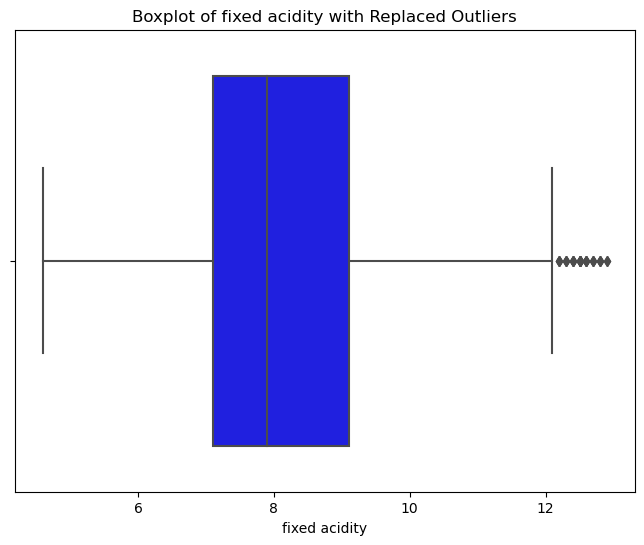

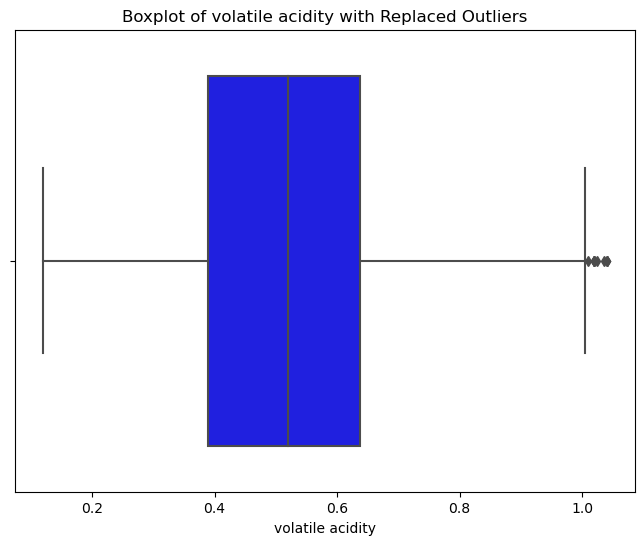

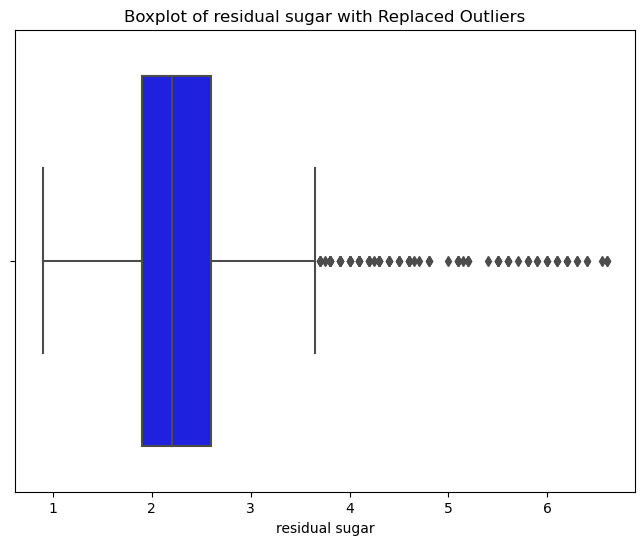

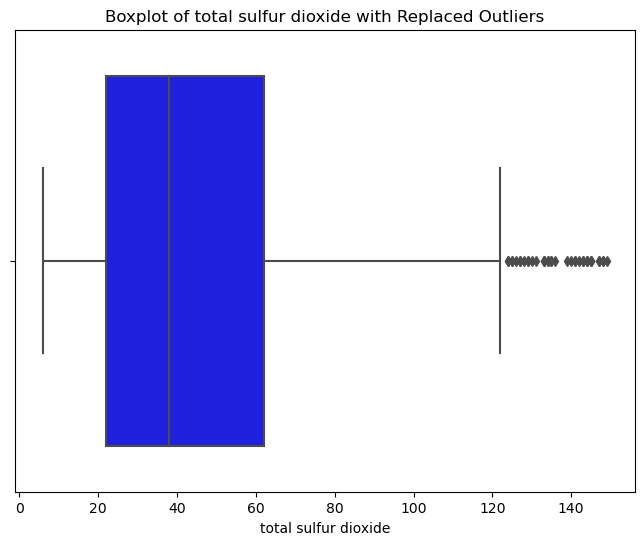

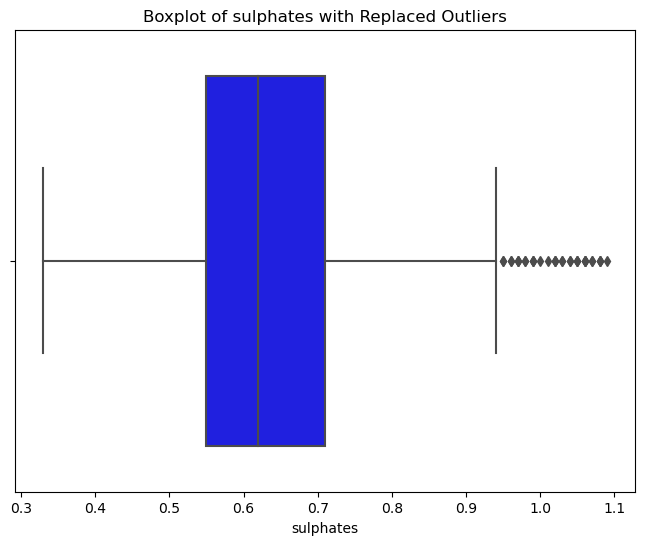

In [41]:
# 'winequality-red.csv' 파일에서 데이터를 읽어옴
wine = pd.read_csv('./winequality-red.csv')
df = wine.copy()
df1 = df.drop_duplicates()

# 산점도를 그릴 열 선택
selected_columns = ['fixed acidity', 'volatile acidity', 'residual sugar', 'total sulfur dioxide', 'sulphates']

# 각 열에 대한 임계값 및 상한값 딕셔너리 정의
criteria = {
    'fixed acidity': 12.9,
    'volatile acidity': 1.04,
    'residual sugar': 6.6,
    'total sulfur dioxide': 149.0,
    'sulphates': 1.09
}

upper_bound_values = {
    'fixed acidity': df1['fixed acidity'].quantile(0.75) + 1.5 * (df1['fixed acidity'].quantile(0.75) - df1['fixed acidity'].quantile(0.25)),
    'volatile acidity': df1['volatile acidity'].quantile(0.75) + 1.5 * (df1['volatile acidity'].quantile(0.75) - df1['volatile acidity'].quantile(0.25)),
    'residual sugar': df1['residual sugar'].quantile(0.75) + 1.5 * (df1['residual sugar'].quantile(0.75) - df1['residual sugar'].quantile(0.25)),
    'total sulfur dioxide': df1['total sulfur dioxide'].quantile(0.75) + 1.5 * (df1['total sulfur dioxide'].quantile(0.75) - df1['total sulfur dioxide'].quantile(0.25)),
    'sulphates': df1['sulphates'].quantile(0.75) + 1.5 * (df1['sulphates'].quantile(0.75) - df1['sulphates'].quantile(0.25))
}

# 각 열에 대해 반복하여 이상치를 중앙값으로 대체한 후 상자그림 그리기
for column_name in selected_columns:
    # IQR 계산
    Q1 = df1[column_name].quantile(0.25)
    Q3 = df1[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 경계 정의
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 임계값 및 상한값 지정
    threshold = criteria[column_name]
    upper_bound_value = upper_bound_values[column_name]

    # 이상치에 해당하는 데이터 선택
    red_points = df1[df1[column_name] > threshold]

    # 이상치를 중앙값으로 대체
    df1.loc[red_points.index, column_name] = df1[column_name].median()

    # 상자그림 그리기
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df1[column_name], color='blue')
    plt.title(f'Boxplot of {column_name} with Replaced Outliers')
    plt.show()

# 3.2 주관적 판단하지 않은 이상치를 가지는 변수(파랑, 빨강)
- 상자그림과 히스토그램을 비교해서 굳이 이상치를 정상범위에 넣을 필요가 없다고 판단
------------------------------------------------------------------------------
- citric acid

- free sulfur dioxide

- alcohol

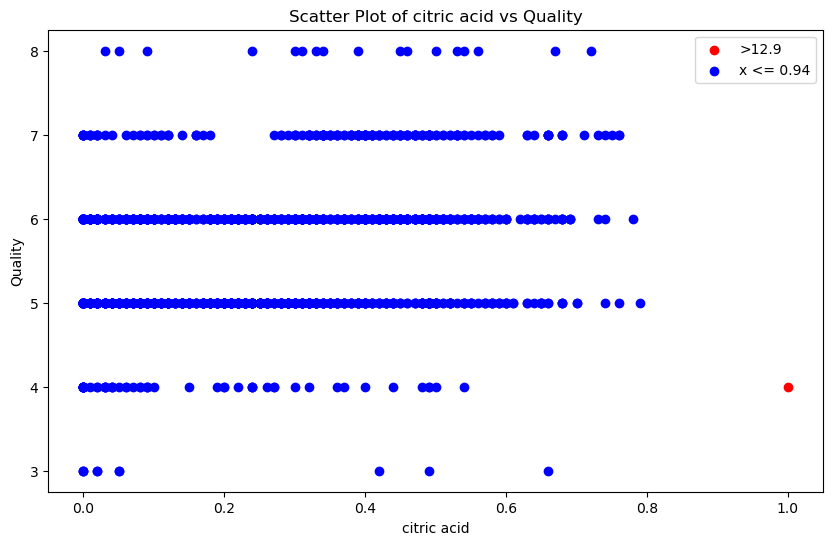

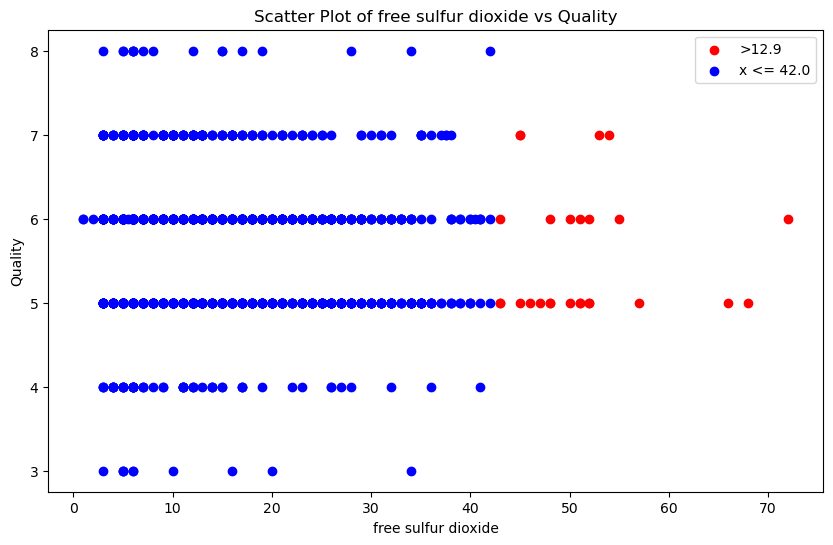

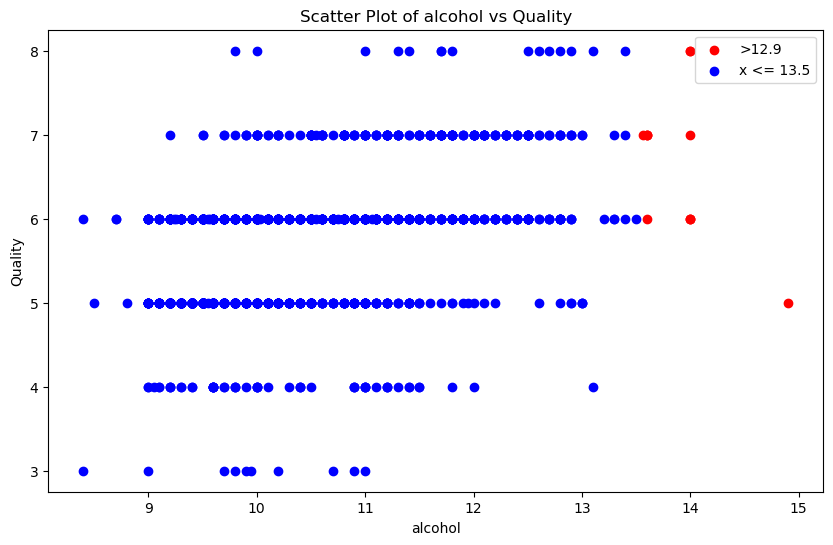

In [42]:
import matplotlib.pyplot as plt

# 선택할 열들
selected_columns = ['citric acid', 'free sulfur dioxide', 'alcohol']

# 반복문으로 각 열에 대한 산점도 그리기
for column_name in selected_columns:
    # IQR 계산
    Q1 = df1[column_name].quantile(0.25)
    Q3 = df1[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 경계 정의
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 플롯 생성
    plt.figure(figsize=(10, 6))

    # 특정 조건에 맞는 데이터 선택
    red_points = df1[df1[column_name] > upper_bound]
    blue_points = df1[df1[column_name] <= upper_bound]

    # 빨간색 점 플롯
    plt.scatter(red_points[column_name], red_points['quality'], color='red', label=f'>{12.9}')

    # 파란색 점 플롯
    plt.scatter(blue_points[column_name], blue_points['quality'], color='blue', label=f'x <= {upper_bound}')

    # 축 및 레이블 설정
    plt.xlabel(column_name)
    plt.ylabel('Quality')
    plt.title(f'Scatter Plot of {column_name} vs Quality')
    plt.legend()

    # 플롯 표시
    plt.show()

- 위에는 이상치를 정상 범위에 넣는 데이터가 없으므로 그냥 그대로 유지

# 3.3 Z score 통해 이상치 판단
- Z score를 통해 정규분포를 만들고 정규분포 전과 후의 이상치 차이를 보고 이상치를 판단함.
------------------------------------------------------------------------------
- pH

- density

# 3.3(1) pH

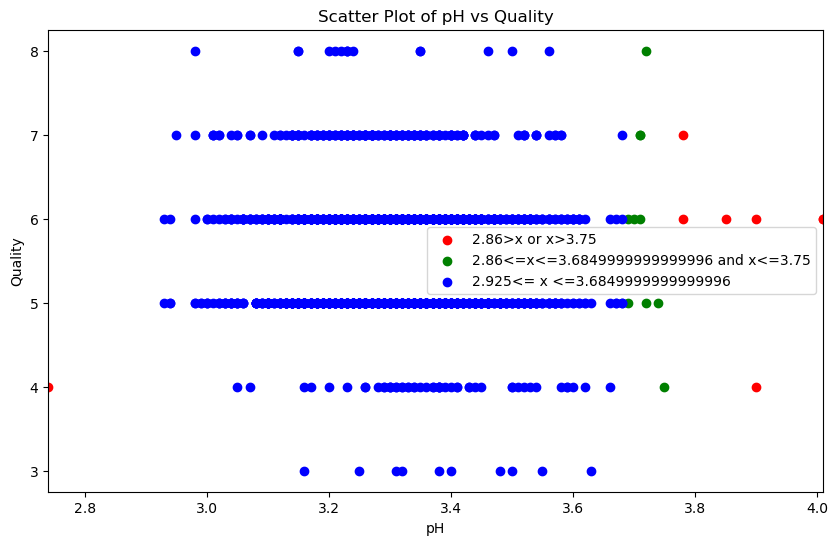

In [44]:
import matplotlib.pyplot as plt

# 선택한 열
column_name = 'pH'

# IQR 계산
Q1 = df1[column_name].quantile(0.25)
Q3 = df1[column_name].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 플롯 생성
plt.figure(figsize=(10, 6))

# 특정 조건에 맞는 데이터 선택
red_points = df1[(df1[column_name] < 2.86) | (df1[column_name] > 3.75)]
green_points = df1[(df1[column_name] > upper_bound) & (df1[column_name] <= 3.75) & (df1[column_name] >= 2.86)]
blue_points = df1[(df1[column_name] <= upper_bound) & (df1[column_name] >= lower_bound)]

# 빨간색 점 플롯
plt.scatter(red_points[column_name], red_points['quality'], color='red', label='2.86>x or x>3.75')

# 초록색 점 플롯 
plt.scatter(green_points[column_name], green_points['quality'], color='green', label=f'2.86<=x<={upper_bound} and x<=3.75')

# 파란색 점 플롯
plt.scatter(blue_points[column_name], blue_points['quality'], color='blue', label=f'{lower_bound}<= x <={upper_bound}')

# x 축 범위 설정
plt.xlim(df1[column_name].min(), df1[column_name].max())

# 축 및 레이블 설정
plt.xlabel(column_name)
plt.ylabel('Quality')
plt.title(f'Scatter Plot of {column_name} vs Quality')
plt.legend()

# 플롯 표시
plt.show()


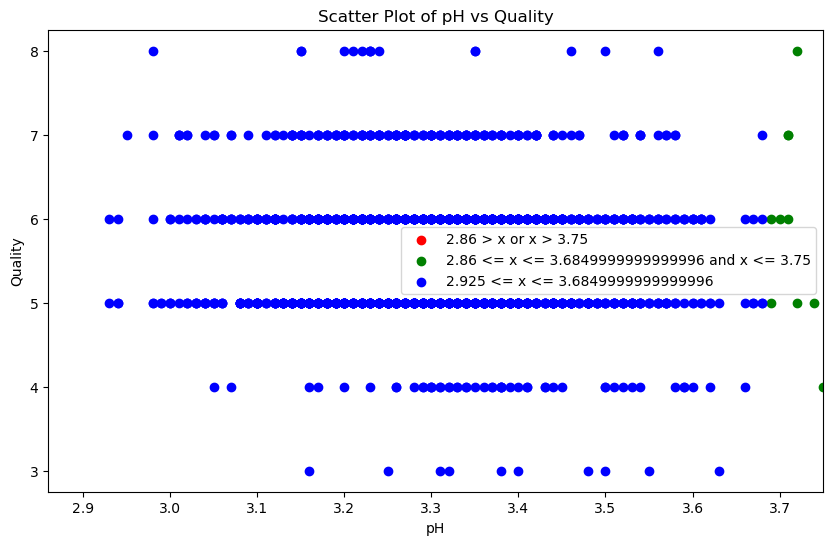

In [45]:
import matplotlib.pyplot as plt

# 선택한 열
column_name = 'pH'

# IQR 계산
Q1 = df1[column_name].quantile(0.25)
Q3 = df1[column_name].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 플롯 생성
plt.figure(figsize=(10, 6))

# 특정 조건에 맞는 데이터 선택
red_points = df1[(df1[column_name] < 2.86) | (df1[column_name] > 3.75)]
green_points = df1[(df1[column_name] > upper_bound) & (df1[column_name] <= 3.75) & (df1[column_name] >= 2.86)]
blue_points = df1[(df1[column_name] <= upper_bound) & (df1[column_name] >= lower_bound)]

# 중앙값으로 이상치 대체
df1.loc[red_points.index, column_name] = df1[column_name].median()

# 빨간색 점 플롯
plt.scatter(red_points[column_name], red_points['quality'], color='red', label='2.86 > x or x > 3.75')

# 초록색 점 플롯 
plt.scatter(green_points[column_name], green_points['quality'], color='green', label=f'2.86 <= x <= {upper_bound} and x <= 3.75')

# 파란색 점 플롯
plt.scatter(blue_points[column_name], blue_points['quality'], color='blue', label=f'{lower_bound} <= x <= {upper_bound}')

# x 축 범위 설정
plt.xlim(df1[column_name].min(), df1[column_name].max())

# 축 및 레이블 설정
plt.xlabel(column_name)
plt.ylabel('Quality')
plt.title(f'Scatter Plot of {column_name} vs Quality')
plt.legend()

# 플롯 표시
plt.show()

- 파랑은 정상범위 초록은 이상치지만 정상범위에 포함하고 빨강은 후에 이상치 처리를 할거임

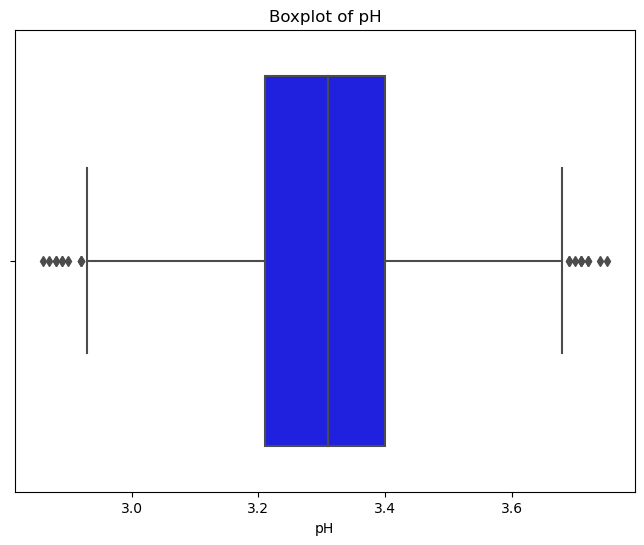

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# 선택한 열
column_name = 'pH'

# 플롯 생성
plt.figure(figsize=(8, 6))

# 'pH'에 대한 상자그림 그리기
sns.boxplot(x=df1[column_name], color='blue')
plt.title(f'Boxplot of {column_name}')

plt.show()

In [ ]:
- 이상치 판단 후 상자 그림(이상치 처리 전)

In [ ]:
# 3.3(2) density

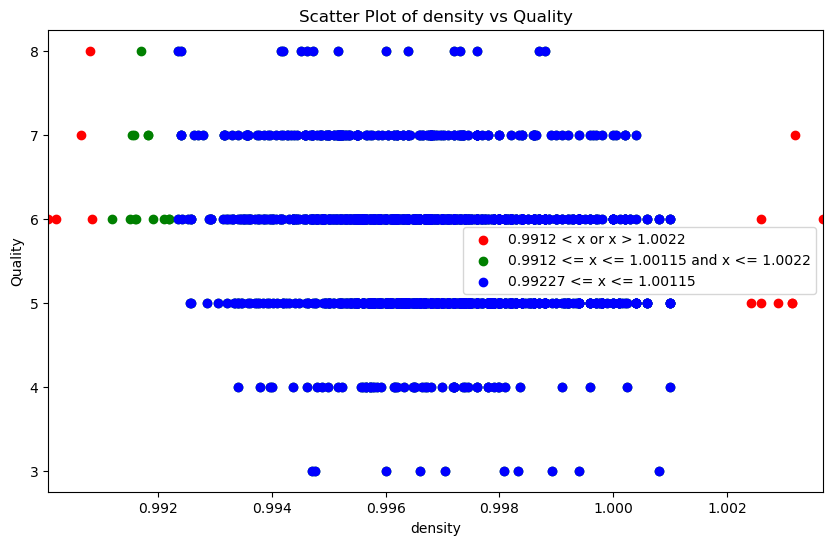

In [47]:
import matplotlib.pyplot as plt

# 선택한 열
column_name = 'density'

# IQR 계산
Q1 = df1[column_name].quantile(0.25)
Q3 = df1[column_name].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 플롯 생성
plt.figure(figsize=(10, 6))

# 특정 조건에 맞는 데이터 선택
red_points = df1[(df1[column_name] < 0.9912) | (df1[column_name] > 1.0022)]
green_points = df1[(df1[column_name] >= 0.9912) & (df1[column_name] <= upper_bound) & (df1[column_name] <= 1.0022)]
blue_points = df1[(df1[column_name] <= upper_bound) & (df1[column_name] >= lower_bound)]

# 빨간색 점 플롯
plt.scatter(red_points[column_name], red_points['quality'], color='red', label='0.9912 < x or x > 1.0022')

# 초록색 점 플롯
plt.scatter(green_points[column_name], green_points['quality'], color='green', label=f'0.9912 <= x <= {upper_bound} and x <= 1.0022')

# 파란색 점 플롯
plt.scatter(blue_points[column_name], blue_points['quality'], color='blue', label=f'{lower_bound} <= x <= {upper_bound}')

# x 축 범위 설정
plt.xlim(df1[column_name].min(), df1[column_name].max())

# 축 및 레이블 설정
plt.xlabel(column_name)
plt.ylabel('Quality')
plt.title(f'Scatter Plot of {column_name} vs Quality')
plt.legend()

# 플롯 표시
plt.show()

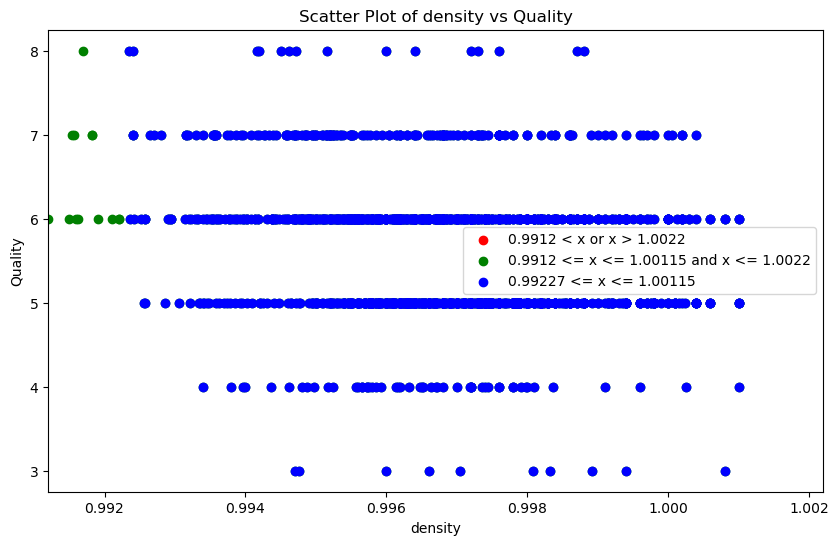

In [48]:
import matplotlib.pyplot as plt

# 선택한 열
column_name = 'density'

# IQR 계산
Q1 = df1[column_name].quantile(0.25)
Q3 = df1[column_name].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 플롯 생성
plt.figure(figsize=(10, 6))

# 특정 조건에 맞는 데이터 선택
red_points = df1[(df1[column_name] < 0.9912) | (df1[column_name] > 1.0022)]
green_points = df1[(df1[column_name] >= 0.9912) & (df1[column_name] <= upper_bound) & (df1[column_name] <= 1.0022)]
blue_points = df1[(df1[column_name] <= upper_bound) & (df1[column_name] >= lower_bound)]

# 중앙값으로 이상치 대체
df1.loc[red_points.index, column_name] = df1[column_name].median()

# 빨간색 점 플롯
plt.scatter(red_points[column_name], red_points['quality'], color='red', label='0.9912 < x or x > 1.0022')

# 초록색 점 플롯
plt.scatter(green_points[column_name], green_points['quality'], color='green', label=f'0.9912 <= x <= {upper_bound} and x <= 1.0022')

# 파란색 점 플롯
plt.scatter(blue_points[column_name], blue_points['quality'], color='blue', label=f'{lower_bound} <= x <= {upper_bound}')

# x 축 범위 설정
plt.xlim(df1[column_name].min(), df1[column_name].max())

# 축 및 레이블 설정
plt.xlabel(column_name)
plt.ylabel('Quality')
plt.title(f'Scatter Plot of {column_name} vs Quality')
plt.legend()

# 플롯 표시
plt.show()


- 파랑은 정상범위 초록은 이상치지만 정상범위에 포함하고 빨강은 후에 이상치 처리를 할거임

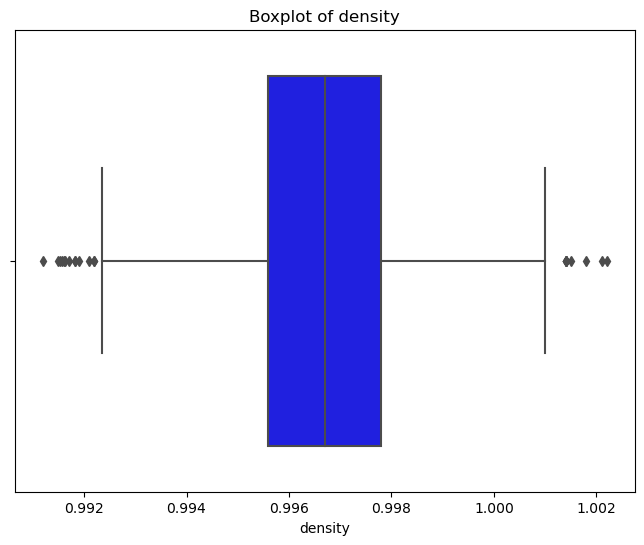

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# 선택한 열
column_name = 'density'

# 플롯 생성
plt.figure(figsize=(8, 6))

# 'density'에 대한 상자그림 그리기
sns.boxplot(x=df1[column_name], color='blue')
plt.title(f'Boxplot of {column_name}')

plt.show()


In [ ]:
- 이상치 판단 후 상자 그림(이상치 처리 전)

# 3.4 규칙성을 찾아 이상치 판단(Chlorides)

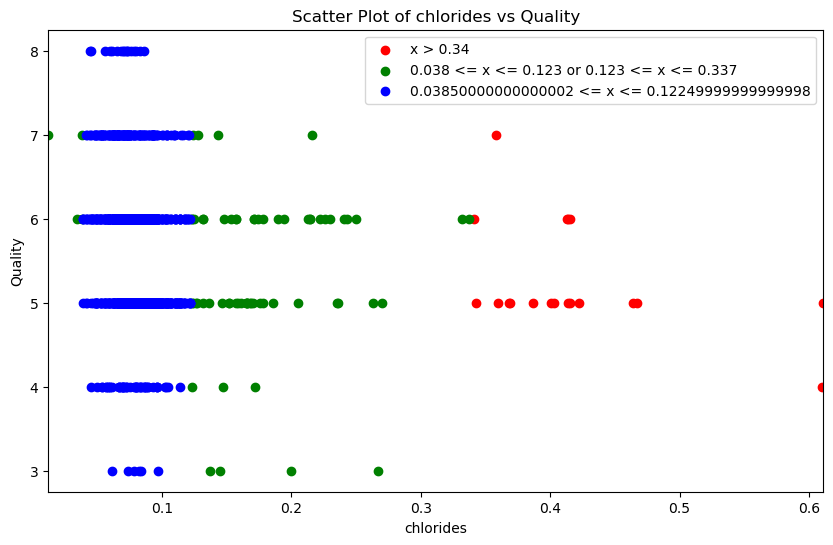

In [50]:
import matplotlib.pyplot as plt

# 선택한 열
column_name = 'chlorides'

# IQR 계산
Q1 = df1[column_name].quantile(0.25)
Q3 = df1[column_name].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 플롯 생성
plt.figure(figsize=(10, 6))

# 특정 조건에 맞는 데이터 선택
red_points = df1[df1[column_name] > 0.34]
green_points = df1[(df1[column_name] <= 0.038) | ((df1[column_name] >= 0.123) & (df1[column_name] <= 0.337))]
blue_points = df1[(df1[column_name] >= lower_bound) & (df1[column_name] <= upper_bound)]

# 빨간색 점 플롯
plt.scatter(red_points[column_name], red_points['quality'], color='red', label='x > 0.34')

# 초록색 점 플롯
plt.scatter(green_points[column_name], green_points['quality'], color='green', label='0.038 <= x <= 0.123 or 0.123 <= x <= 0.337')

# 파란색 점 플롯
plt.scatter(blue_points[column_name], blue_points['quality'], color='blue', label=f'{lower_bound} <= x <= {upper_bound}')

# x 축 범위 설정
plt.xlim(df1[column_name].min(), df1[column_name].max())

# 축 및 레이블 설정
plt.xlabel(column_name)
plt.ylabel('Quality')
plt.title(f'Scatter Plot of {column_name} vs Quality')
plt.legend()

# 플롯 표시
plt.show()


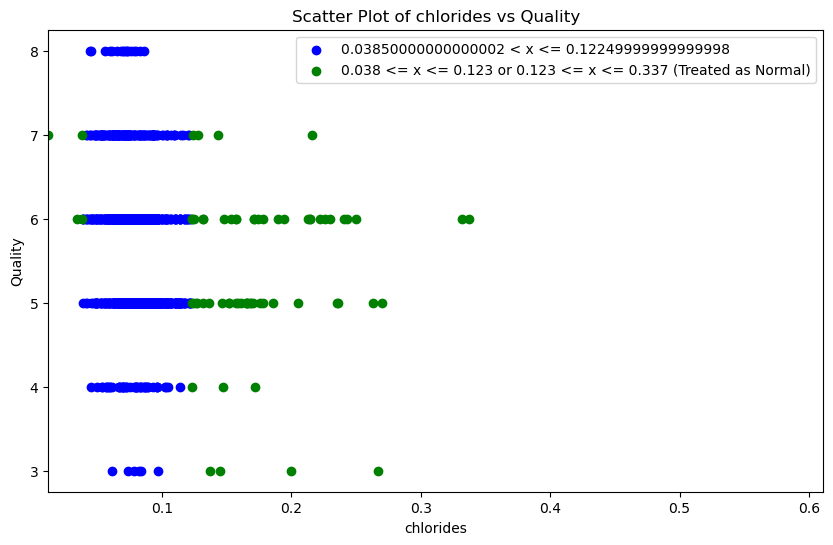

In [52]:
import matplotlib.pyplot as plt

# 선택한 열
column_name = 'chlorides'

# IQR 계산
Q1 = df1[column_name].quantile(0.25)
Q3 = df1[column_name].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 플롯 생성
plt.figure(figsize=(10, 6))

# 특정 조건에 맞는 데이터 선택
red_points = df1[df1[column_name] > 0.34]
green_points = df1[(df1[column_name] <= 0.038) | ((df1[column_name] >= 0.123) & (df1[column_name] <= 0.337))]
blue_points = df1[(df1[column_name] >= lower_bound) & (df1[column_name] <= upper_bound)]


# 파란색 점 플롯 (정상 범위)
plt.scatter(blue_points[column_name], blue_points['quality'], color='blue', label=f'{lower_bound} < x <= {upper_bound}')

# 초록색 점 플롯 (이상치로 표시되지만 정상 범위에 포함할 것)
# 초록색 부분은 이상치로 표시하면서 그대로 유지
plt.scatter(green_points[column_name], green_points['quality'], color='green', label=f'0.038 <= x <= 0.123 or 0.123 <= x <= 0.337 (Treated as Normal)')

# x 축 범위 설정
plt.xlim(df1[column_name].min(), df1[column_name].max())

# 축 및 레이블 설정
plt.xlabel(column_name)
plt.ylabel('Quality')
plt.title(f'Scatter Plot of {column_name} vs Quality')
plt.legend()

# 플롯 표시
plt.show()


In [ ]:
- 초록 부분을 정상 범주로 넣음

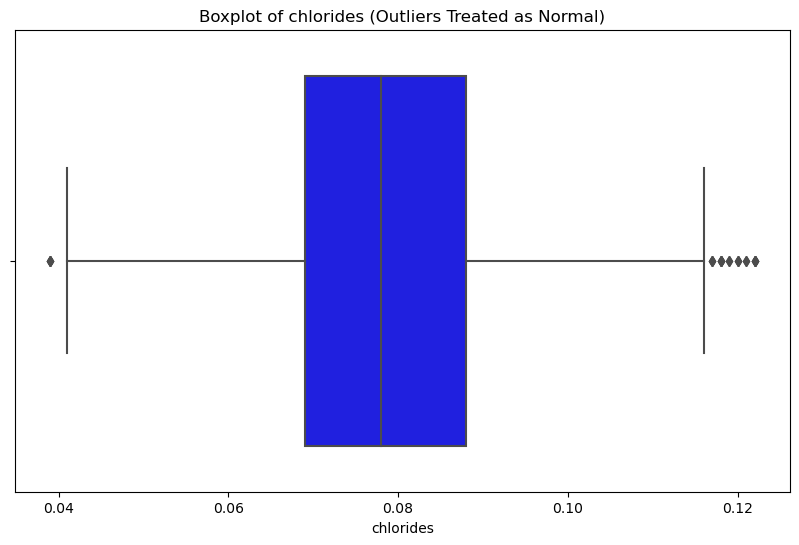

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# 선택한 열
column_name = 'chlorides'

# 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 데이터 선택
normal_points = df1[(df1[column_name] >= lower_bound) & (df1[column_name] <= upper_bound)]

# 플롯 생성
plt.figure(figsize=(10, 6))

# 상자그림 그리기
sns.boxplot(x=column_name, data=normal_points, color='blue')

# 축 및 레이블 설정
plt.xlabel(column_name)
plt.title(f'Boxplot of {column_name} (Outliers Treated as Normal)')

# 플롯 표시
plt.show()
